# Chapter 4, inference / hypothesis testing

## C1

In [ ]:
import wooldridge
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt


# Cargar datos
data = wooldridge.data('vote1')

vote = pd.DataFrame(data)


In [16]:
# Crear el modelo 
model = ols('voteA ~ lexpendA + lexpendB + prtystrA', data=vote).fit()

In [18]:
# Print model summary
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     215.2
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.76e-57
Time:                        17:27:40   Log-Likelihood:                -596.86
No. Observations:                 173   AIC:                             1202.
Df Residuals:                     169   BIC:                             1214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.0789      3.926     11.481      0.0

(i) **interpretation of b1**
b1 models a level-log relationship, but vote is a percentage, a change of 1% in expendA changes the predicted percentage of vote by .06% in a similar direction of the change.

(ii)**In terms of the parameters, state the null hypothesis that a 1% increase in A’s expenditures is offset by a 1% increase in B’s expenditures.** H0 : B1 = -B2

(iii) **Estimate the given model using the data in VOTE1.RAW and report the results 
in usual form. Do A’s expenditures affect the outcome? What about B’s expenditures? Can you use these results to test the hypothesis in part (ii)?** lexpendA has a coef of 6.08 and a std error of .382, which gives us a t statistic of 15.9 which means it is very significant both practically as statistically. Similarly, lexpendB has a coef of -6.61, a SD of .379 and a t of -17.463. It is also both practically and statistically significant and important. Both have similar results in the opposite direction, which is expected due to the non-zero sum aspect of an election. Further analysis is required to quantify and reject the hypothesis that a 1% increase in A is offset by 1% increase in B, such as applying a t test between the two parameters, which would require us to estimate a model that gives the t statistic for testing the hypothesis by reparametrization or to compute the standard error of B1-B2

(iv) Estimate a model that directly gives the t statistic for testing the hypothesis in part 
(ii). What do you conclude? (Use a two-sided alternative.)




voteA = β₀ + β₁lexpendA + β₂lexpendB + β₃prtystrA + u

Hypothesis: H0:B1=-B2

we sum and substract B2expend, to obtain the coefficient B1+B2 and prove if it is 0

voteA = β₀ + β₁lexpendA + β₂lexpendB + β₂lexpendA - β₂lexpendA + β₃prtystrA + u

voteA = β₀ + β₂(lexpendA + lexpendB) + (β₁ + β₂)lexpendA + β₃prtystrA + u

θ = β₂ (coeficiente de sum_expend)
γ = β₁ + β₂ (coeficiente de lexpendA)

voteA = β₀ + θ(lexpendA + lexpendB) + γ(lexpendA) + β₃prtystrA + u



In [23]:
# Answer to 4:
from scipy import stats  

# Crear nueva variable que representa la suma de los coeficientes
vote['sum_expend'] = vote['lexpendA'] + vote['lexpendB']

# Modelo reparametrizado
# voteA = β₀ + θ(lexpendA + lexpendB) + γ(lexpendA) + β₃prtystrA + u
# donde γ = (β₁ + β₂)/2 es el coeficiente que queremos probar si es 0
modelo_rep = ols('voteA ~ sum_expend + lexpendA + prtystrA', data=vote).fit()

print("Resultados del modelo reparametrizado:")
print("=====================================")
print(modelo_rep.summary())

# Calcular el p-valor para la prueba de dos colas
t_stat = modelo_rep.tvalues['lexpendA']
p_valor = 2 * (1 - stats.t.cdf(abs(t_stat), df=modelo_rep.df_resid))

print("\nPrueba de hipótesis H₀: β₁ = -β₂")
print("===================================")
print(f"t-estadístico: {t_stat:.4f}")
print(f"p-valor: {p_valor:.4e}")

Resultados del modelo reparametrizado:
                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     215.2
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.76e-57
Time:                        17:58:27   Log-Likelihood:                -596.86
No. Observations:                 173   AIC:                             1202.
Df Residuals:                     169   BIC:                             1214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    

(iv) with a t statistic of 23.38 and a p value of almost 0, we can reject the null hipothesis that B1 = -B2. This means that the effects in expenditure aren't symmetric, where the expenditures by candidate B have a marginally bigger effect in voting.

## C2 
LSAT is the median LSAT score for the graduating class, GPA is the median college 
GPA for the class, libvol is the number of volumes in the law school library, cost is the annual cost of attending law school, and rank is a law school ranking (with rank 5 1 being 
the best).

In [29]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns

data = woo.data('lawsch85')



In [30]:
modelo = ols('lsalary ~ LSAT + GPA + llibvol + lcost + rank', data=data)

resultados = modelo.fit()


print("\nResultados de la Regresión:")
print(resultados.summary())


Resultados de la Regresión:
                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     138.2
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           2.93e-50
Time:                        18:28:35   Log-Likelihood:                 107.33
No. Observations:                 136   AIC:                            -202.7
Df Residuals:                     130   BIC:                            -185.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3432  

(i)state and test the null hypothesis 
that the rank of law schools has no ceteris paribus effect on median starting salary.

H0: Brank = 0

the t statistic of rank is -9.541, which indicates that the rank of the school has a statistically significant effect on salary.The effect is low when compared to other variables. As it is a log-level relationship, each ranking point is equal to .33% in a change in the salary.

(ii) Are features of the incoming class of students—namely, LSAT and GPA—
individually or jointly significant for explaining salary? (Be sure to account for 
missing data on LSAT and GPA.)

Lsat doesn't seem to have individual significancy. To evaluate joint significance, one may use the F test to evaluate this.

In [33]:
import wooldridge as woo
import numpy as np
from statsmodels.formula.api import ols
import scipy.stats as stats

# Load and clean data
data = woo.data('lawsch85')
data_clean = data.dropna(subset=['LSAT', 'GPA', 'lsalary', 'llibvol', 'lcost', 'rank'])

# Estimate models
full_model = ols('lsalary ~ LSAT + GPA + llibvol + lcost + rank', data=data_clean).fit()
restricted_model = ols('lsalary ~ llibvol + lcost + rank', data=data_clean).fit()

# F-test for joint significance
n = full_model.nobs
k_full = full_model.df_model
k_restricted = restricted_model.df_model
q = k_full - k_restricted  # number of restrictions

F = ((full_model.rsquared - restricted_model.rsquared) / q) / \
    ((1 - full_model.rsquared) / (n - k_full - 1))
p_value = 1 - stats.f.cdf(F, q, n - k_full - 1)

# Print results
print(f"Sample size: {n}")
print(f"\nF-statistic: {F:.4f}")
print(f"p-value: {p_value:.4f}")

Sample size: 136.0

F-statistic: 9.9518
p-value: 0.0001


Both are jointly significant.

(iii) Test whether the size of the entering class (clsize) or the size of the faculty 
( faculty) needs to be added to this equation; carry out a single test. (Be careful to 
account for missing data on clsize and faculty.)

H0 : Bclsize, Bfaculty = 0
H1 : Bclsize, Bfaculty =/ 0



In [36]:
import wooldridge as woo
from statsmodels.formula.api import ols
import scipy.stats as stats

# Load and clean data
data = woo.data('lawsch85')
data_clean = data.dropna(subset=['LSAT', 'GPA', 'lsalary', 'llibvol', 'lcost', 'rank', 'clsize', 'faculty'])

# Extended model
extended_model = ols('lsalary ~ LSAT + GPA + llibvol + lcost + rank + clsize + faculty', 
                    data=data_clean).fit()

# Base model
base_model = ols('lsalary ~ LSAT + GPA + llibvol + lcost + rank', 
                data=data_clean).fit()

# F-test
n = base_model.nobs
k_extended = extended_model.df_model
k_base = base_model.df_model
q = k_extended - k_base

F = ((extended_model.rsquared - base_model.rsquared) / q) / \
    ((1 - extended_model.rsquared) / (n - k_extended - 1))
p_value = 1 - stats.f.cdf(F, q, n - k_extended - 1)

# Print results
print(f"Sample size: {n}")
print(f"\nF-test for joint significance of class size and faculty:")
print(f"F-statistic: {F:.4f}")
print(f"p-value: {p_value:.4f}")

print("\nCoefficients for added variables:")
print(f"{'Variable':<10} {'Coefficient':>12} {'Std Error':>12} {'t-stat':>10} {'p-value':>10}")
print("-" * 55)
print(f"{'clsize':<10} {extended_model.params['clsize']:12.4f} "
      f"{extended_model.bse['clsize']:12.4f} "
      f"{(extended_model.params['clsize']/extended_model.bse['clsize']):10.4f} "
      f"{extended_model.pvalues['clsize']:10.4f}")
print(f"{'faculty':<10} {extended_model.params['faculty']:12.4f} "
      f"{extended_model.bse['faculty']:12.4f} "
      f"{(extended_model.params['faculty']/extended_model.bse['faculty']):10.4f} "
      f"{extended_model.pvalues['faculty']:10.4f}")

Sample size: 131.0

F-test for joint significance of class size and faculty:
F-statistic: 0.9484
p-value: 0.3902

Coefficients for added variables:
Variable    Coefficient    Std Error     t-stat    p-value
-------------------------------------------------------
clsize           0.0001       0.0002     0.8741     0.3838
faculty          0.0001       0.0004     0.1687     0.8663


The F statistic is .9484 and the p-value is .3902
There is very little evidence that adding clsize and faculty will improve the model, so we fail to reject H0


(iv) What factors might influence the rank of the law school that are not included in the model?

- Bar passage rate
- Student acceptance ratio
- Number and quality of academic papers
- Ratio of employment after graduation

## C3

Use the log of the housing price as the 
dependent variable:
log(price) = b0 + b1sqrft + b2bdrms + u.
(i) You are interested in estimating and obtaining a confidence interval for the percentage change in price when a 150-square-foot bedroom is added to a house. In decimal 
form, this is θ = 150b1 + b2. Use the data in HPRICE1.RAW to estimate θ.

In [1]:
import wooldridge
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.formula.api import ols

data = wooldridge.data('hprice1')

print (data.columns)

Index(['price', 'assess', 'bdrms', 'lotsize', 'sqrft', 'colonial', 'lprice',
       'lassess', 'llotsize', 'lsqrft'],
      dtype='object')


In [3]:

model = ols('lprice ~ sqrft + bdrms', data=data).fit()

beta1 = model.params['sqrft']
beta2 = model.params['bdrms']

# Theta 1 which represents a new bedroom of 150 sqrft
theta1 = 150 * beta1 + beta2

# Covariance matrix
vcov = model.cov_params()

# Standard error of theta1
var_theta1 = (150**2 * vcov.loc['sqrft', 'sqrft'] +
              vcov.loc['bdrms', 'bdrms'] +
              2 * 150 * vcov.loc['sqrft', 'bdrms'])
se_theta1 = np.sqrt(var_theta1)


In [4]:
# Confidence interval of price when theta1 (a 150 ft room) is added 
degrees_of_freedom = model.df_resid
t_critical = stats.t.ppf(0.975, degrees_of_freedom)
ci_lower = theta1 - t_critical * se_theta1
ci_upper = theta1 + t_critical * se_theta1

# Dataframe with the results

results_df = pd.DataFrame({
    'Métrica': ['θ₁ (efecto combinado)', 
                'Error Estándar', 
                'IC 95% - Límite Inferior',
                'IC 95% - Límite Superior',
                'Efecto Porcentual'],
    'Valor': [theta1, 
              se_theta1, 
              ci_lower, 
              ci_upper,
              (np.exp(theta1) - 1) * 100]  # Conversión a cambio porcentual exacto
})

print("\nResultados del Análisis:")
print("========================")
print(results_df.to_string(index=False))



Resultados del Análisis:
                 Métrica    Valor
   θ₁ (efecto combinado) 0.085801
          Error Estándar 0.026768
IC 95% - Límite Inferior 0.032580
IC 95% - Límite Superior 0.139022
       Efecto Porcentual 8.958985


In [7]:
# Imprimir estadísticas adicionales del modelo
print("\nEstadísticas del Modelo:")
print("=======================")
print(f"R² ajustado: {model.rsquared_adj:.4f}")
print(f"Estadístico F: {model.fvalue:.2f}")
print(f"Valor p (F): {model.f_pvalue:.4e}")



Estadísticas del Modelo:
R² ajustado: 0.5786
Estadístico F: 60.73
Valor p (F): 4.1679e-17


In [9]:

# Imprimir los coeficientes individuales y sus estadísticas
print("\nCoeficientes Individuales:")
print(model.summary().tables[1])


Coeficientes Individuales:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7660      0.097     49.112      0.000       4.573       4.959
sqrft          0.0004   4.32e-05      8.781      0.000       0.000       0.000
bdrms          0.0289      0.030      0.974      0.333      -0.030       0.088


## C4

This exercise asks to compute an F statistic to determine if parents' education are statistically significant on an incomplete dataset, so that we can compare the results of when it is computed on the data that is complete.

The unrestricted model is bwght = β₀ + β₁cigs + β₂parity + β₃faminc + β₄motheduc + β₅fatheduc + u

The sample size is 1388, of which only 1191 where used.  R² unrestricted: 0.0387. R² restricted: 0.0364. F: 1.42, mother and father education are statistically insignificant.

Next, we compute the same on the whole dataset, ignoring that there are missing values.

In [10]:
import wooldridge
import pandas as pd
import numpy as np
from scipy import stats

# Cargar los datos
data = wooldridge.data('bwght')

# Verificar el número total de observaciones
print(f"Número total de observaciones en el dataset: {len(data)}")

# 1. Modelo restringido usando todas las observaciones válidas para bwght, cigs, parity, faminc
# Primero veamos cuántas observaciones tenemos para cada variable
print("\nObservaciones disponibles por variable:")
for col in ['bwght', 'cigs', 'parity', 'faminc']:
    print(f"{col}: {data[col].count()} observaciones válidas")

# Ahora seleccionamos solo las variables necesarias para el modelo restringido
X_vars = ['cigs', 'parity', 'faminc']
mask = data[['bwght'] + X_vars].notna().all(axis=1)
model_restricted_full = data[mask]

X_restricted_full = model_restricted_full[X_vars]
y_full = model_restricted_full['bwght']

# Añadir constante
X_restricted_full = pd.concat([pd.Series(1, index=X_restricted_full.index, name='const'), 
                             X_restricted_full], axis=1)

# Calcular beta usando OLS
beta_restricted_full = np.linalg.inv(X_restricted_full.T @ X_restricted_full) @ (X_restricted_full.T @ y_full)

# Calcular valores ajustados y R² para modelo restringido con todas las observaciones válidas
y_hat_restricted_full = X_restricted_full @ beta_restricted_full
mean_y_full = np.mean(y_full)
r2_restricted_full = 1 - (np.sum((y_full - y_hat_restricted_full)**2) / 
                         np.sum((y_full - mean_y_full)**2))

# 2. Modelo restringido usando solo las 1,191 observaciones (del Example 4.9)
mask_complete = data[['bwght', 'cigs', 'parity', 'faminc', 'motheduc', 'fatheduc']].notna().all(axis=1)
model_complete = data[mask_complete]
X_restricted = model_complete[X_vars]
y = model_complete['bwght']

# Añadir constante
X_restricted = pd.concat([pd.Series(1, index=X_restricted.index, name='const'), 
                         X_restricted], axis=1)

# Calcular beta usando OLS
beta_restricted = np.linalg.inv(X_restricted.T @ X_restricted) @ (X_restricted.T @ y)

# Calcular valores ajustados y R² para modelo restringido
y_hat_restricted = X_restricted @ beta_restricted
mean_y = np.mean(y)
r2_restricted = 1 - (np.sum((y - y_hat_restricted)**2) / 
                     np.sum((y - mean_y)**2))

print("\nResultados:")
print(f"Observaciones usadas en Example 4.9 (con datos completos): {len(model_complete)}")
print(f"R² reportado en Example 4.9 (1,191 obs): 0.0364")
print(f"R² calculado con las mismas 1,191 obs: {r2_restricted:.4f}")
print(f"\nObservaciones usadas en modelo restringido (ejercicio C4): {len(model_restricted_full)}")
print(f"R² del modelo restringido (usando todas las obs válidas): {r2_restricted_full:.4f}")

Número total de observaciones en el dataset: 1388

Observaciones disponibles por variable:
bwght: 1388 observaciones válidas
cigs: 1388 observaciones válidas
parity: 1388 observaciones válidas
faminc: 1388 observaciones válidas

Resultados:
Observaciones usadas en Example 4.9 (con datos completos): 1191
R² reportado en Example 4.9 (1,191 obs): 0.0364
R² calculado con las mismas 1,191 obs: 0.0364

Observaciones usadas en modelo restringido (ejercicio C4): 1388
R² del modelo restringido (usando todas las obs válidas): 0.0348


R² is slightly lower when we use all the available samples. 

## C5


Starting from the following equation:
```log(salary) = 11.19 + 0.0689 years + 0.0126 gamesyr + 0.00098 bavg + 0.0144 hrunsyr + 0.0108 rbisyr```

We will analyze:
1. The effect of omitting rbisyr over the coefficient of hrunsyr
2. The impact of including runsyr, fldperc y sbasesyr to the model
3. The joint significance of bavg, fldperc y sbasesyr.

Dataset: MLB1.RAW, Wooldridge

In [11]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Cargar los datos
mlb = woo.data('mlb1')

print(mlb.columns)


Index(['salary', 'teamsal', 'nl', 'years', 'games', 'atbats', 'runs', 'hits',
       'doubles', 'triples', 'hruns', 'rbis', 'bavg', 'bb', 'so', 'sbases',
       'fldperc', 'frstbase', 'scndbase', 'shrtstop', 'thrdbase', 'outfield',
       'catcher', 'yrsallst', 'hispan', 'black', 'whitepop', 'blackpop',
       'hisppop', 'pcinc', 'gamesyr', 'hrunsyr', 'atbatsyr', 'allstar',
       'slugavg', 'rbisyr', 'sbasesyr', 'runsyr', 'percwhte', 'percblck',
       'perchisp', 'blckpb', 'hispph', 'whtepw', 'blckph', 'hisppb',
       'lsalary'],
      dtype='object')


In [12]:
# Original model
X_orig = sm.add_constant(mlb[['years', 'gamesyr', 'bavg', 'hrunsyr', 'rbisyr']])
y = mlb['lsalary']

modelo_original = sm.OLS(y, X_orig).fit()

In [13]:
# (i) model without rbisyr
X_sin_rbi = sm.add_constant(mlb[['years', 'gamesyr', 'bavg', 'hrunsyr']])
modelo_sin_rbi = sm.OLS(y, X_sin_rbi).fit()

In [14]:
# Model with additional vars
X_completo = sm.add_constant(mlb[['years', 'gamesyr', 'bavg', 'hrunsyr', 'runsyr', 'fldperc', 'sbasesyr']])

modelo_completo = sm.OLS(y, X_completo).fit()

In [15]:
def print_results_comparison():
    print("=== Comparación de Modelos ===\n")
    
    # Resultados del modelo original
    print("Modelo Original (ecuación 4.31):")
    print(modelo_original.summary().tables[1])
    print("\nR-cuadrado:", round(modelo_original.rsquared, 4))
    print("\n" + "="*50 + "\n")
    
    # Resultados del modelo sin rbisyr
    print("Modelo sin rbisyr:")
    print(modelo_sin_rbi.summary().tables[1])
    print("\nR-cuadrado:", round(modelo_sin_rbi.rsquared, 4))
    print("\n" + "="*50 + "\n")
    
    # Resultados del modelo completo
    print("Modelo Completo (con variables adicionales):")
    print(modelo_completo.summary().tables[1])
    print("\nR-cuadrado:", round(modelo_completo.rsquared, 4))

In [16]:
def test_joint_significance():
    # Prueba F para la significancia conjunta de bavg, fldperc y sbasesyr
    # Crear modelos restringido y no restringido
    variables_restriccion = ['bavg', 'fldperc', 'sbasesyr']
    variables_base = ['years', 'gamesyr', 'hrunsyr', 'runsyr']
    
    # Modelo no restringido (completo)
    X_no_restringido = sm.add_constant(mlb[variables_base + variables_restriccion])
    modelo_no_restringido = sm.OLS(y, X_no_restringido).fit()
    
    # Modelo restringido (sin las variables a probar)
    X_restringido = sm.add_constant(mlb[variables_base])
    modelo_restringido = sm.OLS(y, X_restringido).fit()
    
    # Calcular estadístico F
    n = len(y)
    k_no_restringido = len(X_no_restringido.columns)
    k_restringido = len(X_restringido.columns)
    q = k_no_restringido - k_restringido
    
    F_stat = ((modelo_restringido.ssr - modelo_no_restringido.ssr) / q) / \
             (modelo_no_restringido.ssr / (n - k_no_restringido))
    
    p_value = 1 - stats.f.cdf(F_stat, q, n - k_no_restringido)
    
    print("\n=== Prueba F de Significancia Conjunta ===")
    print(f"Variables probadas: {', '.join(variables_restriccion)}")
    print(f"Estadístico F: {F_stat:.4f}")
    print(f"Valor p: {p_value:.4f}")
    print(f"Grados de libertad: ({q}, {n - k_no_restringido})")

In [17]:
print_results_comparison()
test_joint_significance()

=== Comparación de Modelos ===

Modelo Original (ecuación 4.31):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1924      0.289     38.752      0.000      10.624      11.760
years          0.0689      0.012      5.684      0.000       0.045       0.093
gamesyr        0.0126      0.003      4.742      0.000       0.007       0.018
bavg           0.0010      0.001      0.887      0.376      -0.001       0.003
hrunsyr        0.0144      0.016      0.899      0.369      -0.017       0.046
rbisyr         0.0108      0.007      1.500      0.134      -0.003       0.025

R-cuadrado: 0.6278


Modelo sin rbisyr:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0209      0.266     41.476      0.000      10.498      11.544
years          0.0677    

Hrunsyr increased its t value from 0.899 to 4.964, becoming highly significant. This is likely due to a multicolineality problem, which is logic as home runs will always result in at least 1 Run Batted in.

Since Runs batted in depend so much on other variables, and R² barely changed, one can conclude that rbisyr and hrunsyr capture similar information. 

runsyr, fldperc and sbasesyr have the following coefficients:0.0174, 0.0010 and -0.0064, with respective t statistics of 3.43, 0.516 and -1.238. Runsyr seems to be significant, but one might have doubts about bavg, fldperc and sbasesyr. The joint significance of  bavg, fldperc and sbasesyr variables are very low, with an f statistic of 0.685 and a p value of .5617, which means that there is not enough evidence that they are providing jointly any information to the model, and should be removed.

## C6

Using the data from WAGE2, estimate a log-level equation of salaries. Prove if general experience has the same effect as an extra year of remaining with the present employer. 

h0: β₂ = β₃
H₁: β₂ ≠ β₃

Significance: 5%
Confidence interval: 95%

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from wooldridge import data
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar los datos
df = data('wage2')

In [20]:
X = df[['educ', 'exper', 'tenure']]
X = sm.add_constant(X)
y = df['lwage']

modelo = sm.OLS(y, X).fit()

In [24]:
# Imprimir resultados
print("\nResultados del Modelo de Regresión:")
print("===================================")
print(modelo.summary())
print("\nFactores de Inflación de Varianza (VIF):")
print("=========================================")

# Pruebas adicionales de diagnóstico
print("\nPruebas de Diagnóstico:")
print("======================")
print(f"R-cuadrado: {modelo.rsquared:.4f}")
print(f"R-cuadrado ajustado: {modelo.rsquared_adj:.4f}")
print(f"Estadístico F: {modelo.fvalue:.4f}")
print(f"Prob (F-statistic): {modelo.f_pvalue:.4f}")

# Interpretación de los coeficientes en términos porcentuales
print("\nInterpretación de los Coeficientes:")
print("==================================")
for var, coef in zip(X.columns, modelo.params):
    if var != 'const':
        print(f"\n{var}: Un aumento de 1 año en {var} está asociado con un cambio de {(np.exp(coef)-1)*100:.2f}% en el salario, manteniendo las otras variables constantes")


Resultados del Modelo de Regresión:
                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     56.97
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           8.12e-34
Time:                        17:48:47   Log-Likelihood:                -438.84
No. Observations:                 935   AIC:                             885.7
Df Residuals:                     931   BIC:                             905.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

In [25]:
beta_exper = modelo.params['exper']
beta_tenure = modelo.params['tenure']
cov_matrix = modelo.cov_params()

# Calcular la varianza de la diferencia
# Var(β₂ - β₃) = Var(β₂) + Var(β₃) - 2Cov(β₂,β₃)

var_diff = (cov_matrix.loc['exper', 'exper'] +
            cov_matrix.loc['tenure', 'tenure'] -
            2 * cov_matrix.loc['exper', 'tenure'])

# Calcular estadístico t
diff = beta_exper - beta_tenure
se_diff = np.sqrt(var_diff)
t_stat = diff / se_diff

# Grados de libertad
df_reg = modelo.df_resid

# Valor crítico
t_crit = stats.t.ppf(0.975, df_reg)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df_reg))

# Intervalo de confianza
ic_lower = diff - t_crit * se_diff
ic_upper = diff + t_crit * se_diff

In [26]:
# Imprimir resultados
print("Prueba de Hipótesis: β_exper = β_tenure")
print("=======================================")
print(f"\nCoeficiente de experiencia (β_exper): {beta_exper:.4f}")
print(f"Coeficiente de tenure (β_tenure): {beta_tenure:.4f}")
print(f"Diferencia (β_exper - β_tenure): {diff:.4f}")
print(f"\nError estándar de la diferencia: {se_diff:.4f}")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Grados de libertad: {df_reg}")
print(f"Valor crítico (t_{df_reg},0.025): ±{t_crit:.4f}")
print(f"P-valor: {p_value:.4f}")
print("\nIntervalo de Confianza 95%")
print("==========================")
print(f"Límite inferior: {ic_lower:.4f}")
print(f"Límite superior: {ic_upper:.4f}")

Prueba de Hipótesis: β_exper = β_tenure

Coeficiente de experiencia (β_exper): 0.0153
Coeficiente de tenure (β_tenure): 0.0134
Diferencia (β_exper - β_tenure): 0.0020

Error estándar de la diferencia: 0.0047
Estadístico t: 0.4119
Grados de libertad: 931.0
Valor crítico (t_931.0,0.025): ±1.9625
P-valor: 0.6805

Intervalo de Confianza 95%
Límite inferior: -0.0074
Límite superior: 0.0113


With a t value of .4119 there is not enough evidence that experience is different than tenure, so we can conclude that Bexper = Btenure

## C7

In [31]:
import wooldridge as woo
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = woo.data('twoyear')
print(data.columns)


Index(['female', 'phsrank', 'BA', 'AA', 'black', 'hispanic', 'id', 'exper',
       'jc', 'univ', 'lwage', 'stotal', 'smcity', 'medcity', 'submed',
       'lgcity', 'sublg', 'vlgcity', 'subvlg', 'ne', 'nc', 'south', 'totcoll'],
      dtype='object')


In [33]:
# Calcular estadísticas descriptivas para phsrank
phsrank_stats = {
    'Mínimo': data['phsrank'].min(),
    'Máximo': data['phsrank'].max(),
    'Promedio': data['phsrank'].mean(),
    'Mediana': data['phsrank'].median(),
    'Desviación estándar': data['phsrank'].std()
}

stats_df = pd.DataFrame.from_dict(phsrank_stats, orient='index', columns=['Valor'])
print("Estadísticas descriptivas para phsrank (percentil de rango en la escuela secundaria):")
print(stats_df)


Estadísticas descriptivas para phsrank (percentil de rango en la escuela secundaria):
                         Valor
Mínimo                0.000000
Máximo               99.000000
Promedio             56.157031
Mediana              50.000000
Desviación estándar  24.272964


In [35]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# log(wage) = β₀ + β₁jc + β₂univ + β₃exper + β₄phsrank + u
model = ols('lwage ~ jc + univ + exper + phsrank', data=data)
results = model.fit()
print(results.summary().tables[1])

# Calcular R-cuadrado
print("\nR-cuadrado:", round(results.rsquared, 4))
print("Número de observaciones:", results.nobs)



                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4587      0.024     61.756      0.000       1.412       1.505
jc             0.0662      0.007      9.671      0.000       0.053       0.080
univ           0.0755      0.003     29.496      0.000       0.070       0.080
exper          0.0049      0.000     31.360      0.000       0.005       0.005
phsrank        0.0003      0.000      1.269      0.204      -0.000       0.001

R-cuadrado: 0.2226
Número de observaciones: 6763.0


phsrank:

Not statistically significant (t = 1.26)
Increasing 10 percentile points produce a change of 0.3% in salary (.0003 × 10 × 100)

Adding phsrank doesn't change the conclusions of the model without it.

## C8

In [38]:
import pandas as pd
import numpy as np
import wooldridge as wd
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Cargar los datos
data = wd.data('401ksubs')

# Filtrar solo hogares unipersonales
single_household = data[data['fsize'] == 1].copy()

# (i) Número de hogares unipersonales
n_singles = len(single_household)
print(f"Número de hogares unipersonales: {n_singles}")

# (ii) Estimación del modelo OLS
# Crear el modelo
model = ols('nettfa ~ inc + age', data=single_household)
results = model.fit()

# Imprimir resultados
print("\nResultados de la Regresión:")
print(results.summary().tables[1])

# Calcular R-cuadrado
r2 = results.rsquared
r2_adj = results.rsquared_adj

print(f"\nR-cuadrado: {r2:.4f}")
print(f"R-cuadrado ajustado: {r2_adj:.4f}")

# Diagnósticos básicos
print("\nDiagnósticos del modelo:")
print(f"Test F (p-valor): {results.f_pvalue:.4f}")
print(f"Estadístico F: {results.fvalue:.4f}")

Número de hogares unipersonales: 2017

Resultados de la Regresión:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.0398      4.080    -10.548      0.000     -51.042     -35.038
inc            0.7993      0.060     13.382      0.000       0.682       0.916
age            0.8427      0.092      9.158      0.000       0.662       1.023

R-cuadrado: 0.1193
R-cuadrado ajustado: 0.1185

Diagnósticos del modelo:
Test F (p-valor): 0.0000
Estadístico F: 136.4648


In [39]:
# Extraer coeficiente y error estándar para age
beta_2 = results.params['age']
se_beta_2 = results.bse['age']

# Calcular el estadístico t para H0: β₂ = 1
t_stat = (beta_2 - 1) / se_beta_2

# Calcular el p-valor (prueba de dos colas)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=len(single_household)-3))

print(f"Coeficiente de age (β₂): {beta_2:.4f}")
print(f"Error estándar: {se_beta_2:.4f}")
print(f"Estadístico t: {t_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

# Comparación con regresión simple
simple_model = ols('nettfa ~ inc', data=single_household)
simple_results = simple_model.fit()

print("\nComparación de coeficientes de ingreso:")
print(f"Modelo múltiple: {results.params['inc']:.4f}")
print(f"Modelo simple: {simple_results.params['inc']:.4f}")

Coeficiente de age (β₂): 0.8427
Error estándar: 0.0920
Estadístico t: -1.7099
P-valor: 0.0874

Comparación de coeficientes de ingreso:
Modelo múltiple: 0.7993
Modelo simple: 0.8207


The intercept has no practical meaning in this problem. 

There is no evidence to reject that the effect on age is different than 1.

The coefficient has little change over a simple regression model, which suggests low correlation between these two variables

## C9

This problem investigates if racial discrimination exists in soft drink prices at fast-food restaurants by analyzing whether the percentage of black population in a zip code significantly influences prices, while controlling for socioeconomic variables such as income, poverty rates, housing values.


In [41]:
# Importamos las bibliotecas necesarias
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

# Cargamos los datos
data = woo.data('discrim')
print (data.columns)

Index(['psoda', 'pfries', 'pentree', 'wagest', 'nmgrs', 'nregs', 'hrsopen',
       'emp', 'psoda2', 'pfries2', 'pentree2', 'wagest2', 'nmgrs2', 'nregs2',
       'hrsopen2', 'emp2', 'compown', 'chain', 'density', 'crmrte', 'state',
       'prpblck', 'prppov', 'prpncar', 'hseval', 'nstores', 'income', 'county',
       'lpsoda', 'lpfries', 'lhseval', 'lincome', 'ldensity', 'NJ', 'BK',
       'KFC', 'RR'],
      dtype='object')


In [44]:
# Verificamos valores faltantes o infinitos
print("Información sobre valores faltantes antes de la limpieza:")
print(data[['lpsoda', 'prpblck', 'lincome', 'prppov']].isna().sum())
print("\nInformación sobre valores infinitos antes de la limpieza:")
print(np.isinf(data[['lpsoda', 'prpblck', 'lincome', 'prppov']]).sum())


Información sobre valores faltantes antes de la limpieza:
lpsoda     8
prpblck    1
lincome    1
prppov     1
dtype: int64

Información sobre valores infinitos antes de la limpieza:
lpsoda     0
prpblck    0
lincome    0
prppov     0
dtype: int64


In [46]:
variables_modelo = ['lpsoda', 'prpblck', 'lincome', 'prppov']
data_clean = data[variables_modelo].replace([np.inf, -np.inf], np.nan).dropna()
print("\nTamaño del dataset:")
print(f"Original: {len(data)}")
print(f"Después de limpiar: {len(data_clean)}")



Tamaño del dataset:
Original: 410
Después de limpiar: 401


In [47]:

X = data_clean[['prpblck', 'lincome', 'prppov']]
X = sm.add_constant(X)  # Añadimos la constante
y = data_clean['lpsoda']

# Estimamos el modelo
modelo = sm.OLS(y, X).fit()

# Imprimimos los resultados
print("Resultados de la Regresión:")
print("==========================")
print(modelo.summary())

Resultados de la Regresión:
                            OLS Regression Results                            
Dep. Variable:                 lpsoda   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     12.60
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           6.92e-08
Time:                        18:52:00   Log-Likelihood:                 439.04
No. Observations:                 401   AIC:                            -870.1
Df Residuals:                     397   BIC:                            -854.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4633   

In [48]:
# Análisis específico del coeficiente de prpblck (β1)
beta1 = modelo.params['prpblck']
se_beta1 = modelo.bse['prpblck']
t_stat = beta1 / se_beta1
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=modelo.df_resid))

In [49]:
print("\nAnálisis detallado del coeficiente de prpblck (β1):")
print("=================================================")
print(f"Coeficiente (β1): {beta1:.4f}")
print(f"Error estándar: {se_beta1:.4f}")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")


Análisis detallado del coeficiente de prpblck (β1):
Coeficiente (β1): 0.0728
Error estándar: 0.0307
Estadístico t: 2.3735
Valor p: 0.0181


In [50]:
# Análisis de significancia
alpha_5 = 0.05
alpha_1 = 0.01

print("\nPruebas de Significancia:")
print("========================")
print(f"Valor crítico al 5%: {stats.t.ppf(1-alpha_5/2, df=modelo.df_resid):.4f}")
print(f"Valor crítico al 1%: {stats.t.ppf(1-alpha_1/2, df=modelo.df_resid):.4f}")
print(f"Significativo al 5%: {'Sí' if p_value < alpha_5 else 'No'}")
print(f"Significativo al 1%: {'Sí' if p_value < alpha_1 else 'No'}")



Pruebas de Significancia:
Valor crítico al 5%: 1.9660
Valor crítico al 1%: 2.5883
Significativo al 5%: Sí
Significativo al 1%: No


In [51]:
# Intervalos de confianza
ci_95 = modelo.conf_int().loc['prpblck']
ci_99 = modelo.conf_int(alpha=0.01).loc['prpblck']

print("\nIntervalos de Confianza para β1:")
print("===============================")
print(f"Intervalo de confianza al 95%: [{ci_95[0]:.4f}, {ci_95[1]:.4f}]")
print(f"Intervalo de confianza al 99%: [{ci_99[0]:.4f}, {ci_99[1]:.4f}]")


Intervalos de Confianza para β1:
Intervalo de confianza al 95%: [0.0125, 0.1331]
Intervalo de confianza al 99%: [-0.0066, 0.1522]


In [52]:
# Calculamos la correlación entre lincome y prppov
correlation = data_clean['lincome'].corr(data_clean['prppov'])

print("Correlación entre log(income) y prppov:")
print(f"r = {correlation:.4f}")

Correlación entre log(income) y prppov:
r = -0.8402


In [55]:

data_clean = data[['lpsoda', 'prpblck', 'lincome', 'prppov', 'lhseval']].replace([np.inf, -np.inf], np.nan).dropna()

# Añadimos log(hseval)
X_new = data_clean[['prpblck', 'lincome', 'prppov', 'lhseval']]
X_new = sm.add_constant(X_new)
y = data_clean['lpsoda']

modelo_nuevo = sm.OLS(y, X_new).fit()

print("\nResultados del nuevo modelo (incluyendo lhseval):")
print("===============================================")
print(modelo_nuevo.summary())


Resultados del nuevo modelo (incluyendo lhseval):
                            OLS Regression Results                            
Dep. Variable:                 lpsoda   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     22.31
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.24e-16
Time:                        18:58:13   Log-Likelihood:                 461.55
No. Observations:                 401   AIC:                            -913.1
Df Residuals:                     396   BIC:                            -893.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [56]:
# Parte (iv) - Prueba F para significancia conjunta de lincome y prppov
# Creamos el modelo restringido (sin lincome y prppov)
X_restricted = data_clean[['prpblck', 'lhseval']]
X_restricted = sm.add_constant(X_restricted)
modelo_restringido = sm.OLS(y, X_restricted).fit()

# Realizamos la prueba F
f_stat = ((modelo_restringido.ssr - modelo_nuevo.ssr) / 2) / (modelo_nuevo.ssr / modelo_nuevo.df_resid)
p_value_f = 1 - stats.f.cdf(f_stat, 2, modelo_nuevo.df_resid)

print("\nPrueba de significancia conjunta para lincome y prppov:")
print(f"Estadístico F: {f_stat:.4f}")
print(f"Valor p: {p_value_f:.4f}")


Prueba de significancia conjunta para lincome y prppov:
Estadístico F: 3.5227
Valor p: 0.0304


The analysis reveals that the prpblck coefficient is significant at 5% but not at 1% in the initial model.  (β₁=0.0728, p=0.0181)

There is a strong negative correlation between lincome and prppov, (r=-0.8402) indicating multicollinearity. 

adding lhseval (avg housing prices in the zip code), the prpblck coefficient becomes more significant  (β₁=0.0976, p=0.001) while lincome and prppov lose individual significance, but mantain joint significance  (p=0.0304)

The first model, which only has prpblck (p=0.018) might be capturing both racial and socioeconomic effects.

The second model, with lhseval, should be capturing better the socioeconomic effect. Including this to the model allows us to separate both racial and economic discrimination. Even though there is a clear multicolinallity problem, which might require more discussion to select the proper model.

## C10

The study examines the relationship between salaries and benefits in the school system, specifically analyzing whether there is a trade-off between these compensation components. It seeks to determine if schools offering higher benefits (measured as a benefits-to-salary ratio) tend to pay lower salaries, controlling for factors such as school size (enrollment), staff, and students' socioeconomic status (lunch).

In [57]:
import wooldridge as woo
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Cargar los datos
data = woo.data('elem94_95')

# (i) Regresión simple de lavgsal sobre bs
X = data['bs']
y = data['lavgsal']
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print("Modelo 1: Regresión Simple")
print(model1.summary())

# Test de hipótesis para β = -1
beta_hat = model1.params[1]
se_beta = model1.bse[1]
t_stat = (beta_hat - (-1)) / se_beta
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), model1.df_resid))

print("\nTest de hipótesis para β = -1:")
print(f"t-estadístico: {t_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# (ii) Regresión múltiple añadiendo lenrol y lstaff
X2 = data[['bs', 'lenrol', 'lstaff']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
print("\nModelo 2: Regresión Múltiple")
print(model2.summary())

# (v) Añadir la variable lunch
X3 = data[['bs', 'lenrol', 'lstaff', 'lunch']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3).fit()
print("\nModelo 3: Regresión con lunch")
print(model3.summary())

# Calcular R² para cada modelo
r2_1 = model1.rsquared
r2_2 = model2.rsquared
r2_3 = model3.rsquared

print("\nComparación de R²:")
print(f"R² Modelo 1: {r2_1:.4f}")
print(f"R² Modelo 2: {r2_2:.4f}")
print(f"R² Modelo 3: {r2_3:.4f}")

Modelo 1: Regresión Simple
                            OLS Regression Results                            
Dep. Variable:                lavgsal   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     28.23
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.21e-07
Time:                        19:18:51   Log-Likelihood:                 85.171
No. Observations:                1848   AIC:                            -166.3
Df Residuals:                    1846   BIC:                            -155.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7479    

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_4760\3571619949.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_hat = model1.params[1]
C:\Users\Gerardo\AppData\Local\Temp\ipykernel_4760\3571619949.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_beta = model1.bse[1]


The analyses confirm a negative trade-off between salaries and benefits: for each unit increase in the benefits-to-salary ratio, salaries decrease by approximately 51.6% (in the full model). This relationship remains significant even after controlling for school size, staff, and student socioeconomic characteristics, although its magnitude reduces when including these controls (from -79.5% in the simple model to -51.6% in the full model). The final model explains 48.8% of the variation in salaries (R² = 0.4882).

(i) We can't reject that β = -1

(ii) b/s becomes less negative when we add other variables. It stays significant (p-value < .001) and R² increases substantially

(iii) when adding the variables, the standard error reduces. When compared to multicolineality, the reduction in variance is stronger. This can be explained by the drastic increase in R²

(iv) lstaff seems to be negative and large in magnitude. This reflects a tradeoff between the number of workers and the salary

(v) adding lunch decreases salaries because lunch program is a proxy to lower socioeconomic power. Therefore, if a school is on a zone with higher poverty levels, then the salaries are expected to drop.



## C11

This study analyzes the determinants of the years of education in a person, using parental education, student's ability (including a cuadratic term to capture non-linear effects) and college tuition costs as explanatory variables.

In [60]:
# Importamos las bibliotecas necesarias
import wooldridge as woo
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos
data = woo.data('htv')

# (i) Estimamos el modelo de regresión
# Creamos la variable abil al cuadrado
data['abil2'] = data['abil']**2

# Creamos el modelo con statsmodels
X = sm.add_constant(data[['motheduc', 'fatheduc', 'abil', 'abil2']])
y = data['educ']

# Estimamos el modelo
modelo1 = sm.OLS(y, X).fit()
print("Resultados del modelo inicial:")
print(modelo1.summary())

# Test para relación lineal vs cuadrática (H0: coef_abil2 = 0)
print("\nTest para relación cuadrática:")
print(f"t-estadístico para abil2: {modelo1.tvalues['abil2']:.4f}")
print(f"p-valor para abil2: {modelo1.pvalues['abil2']:.4f}")

# (ii) Test H0: β1 = β2
# Creamos una matriz R para el test de restricción lineal
R = np.array([[0, 1, -1, 0, 0]])  # motheduc - fatheduc = 0
test_result = modelo1.t_test(R)
print("\nTest de igualdad entre coeficientes de motheduc y fatheduc:")
print(f"t-estadístico: {float(test_result.statistic):.4f}")
print(f"p-valor: {float(test_result.pvalue):.4f}")

# (iii) Agregamos variables de matrícula
X2 = sm.add_constant(data[['motheduc', 'fatheduc', 'abil', 'abil2', 'tuit17', 'tuit18']])
modelo2 = sm.OLS(y, X2).fit()

# Test conjunto para las variables de matrícula
R2 = np.zeros((2, 7))  # 7 es el número de parámetros en el modelo2
R2[0, 5] = 1  # coeficiente de tuit17
R2[1, 6] = 1  # coeficiente de tuit18
test_result2 = modelo2.f_test(R2)
print("\nTest conjunto para variables de matrícula:")
print(f"F-estadístico: {float(test_result2.statistic):.4f}")
print(f"p-valor: {float(test_result2.pvalue):.4f}")

# (iv) Correlación entre tuit17 y tuit18
corr = data['tuit17'].corr(data['tuit18'])
print(f"\nCorrelación entre tuit17 y tuit18: {corr:.4f}")

# Creamos el promedio de matrícula
data['tuit_avg'] = (data['tuit17'] + data['tuit18']) / 2

# Modelo con promedio de matrícula
X3 = sm.add_constant(data[['motheduc', 'fatheduc', 'abil', 'abil2', 'tuit_avg']])
modelo3 = sm.OLS(y, X3).fit()
print("\nModelo con promedio de matrícula:")
print(modelo3.summary())



Resultados del modelo inicial:
                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     244.9
Date:                Tue, 12 Nov 2024   Prob (F-statistic):          1.34e-154
Time:                        19:42:26   Log-Likelihood:                -2436.6
No. Observations:                1230   AIC:                             4883.
Df Residuals:                    1225   BIC:                             4909.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2402

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_4760\2605916308.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"t-estadístico: {float(test_result.statistic):.4f}")


The model explains 44.4% of the variation in years of education, where both parental education and student's ability are statistically significant. There is a stronger effect in mother's education(0.19 years) compared to father's education (0.11 years). The relationship between ability and education is quadratic, confirmed by a significant abil^2 term.  Tuition costs, however, show no significant effect on years of education, even when using the average of both periods due to their high correlation.

(i) H₀: β₄abil² = 0 H₁: β₄ ≠ 0. With a t-statistic of 6.093, we know the relation is quadratic.
(ii) H0: β1 = β2. With a t-statistic of 1.93, we cant reject that these coefficients (mother and father educ) are equal. However, we have evidence to reject it at 10%
(iii) We cant reject that tuition isn't 0.
(iv) tuit17 and tuit18 are highly correlated. It is better to use the average of both due to their correlation. Averaging both years (which are highly correlated at 0.9808) is preferred as it reduces measurement error, provides a more representative measure of the true tuition costs faced by students, and still maintains model parsimony while avoiding multicollinearity issues.
(v) Including the average tuition didn't change R², and isn't statistically significant.



# Chapter 5 OLS Asymptotics

## C1 
Relationship between salaries and educational/work variables using the following models:

1. level-level: wage = β₀ + β₁educ + β₂exper + β₃tenure + u
2. log-level: log(wage) = β₀ + β₁educ + β₂exper + β₃tenure + u

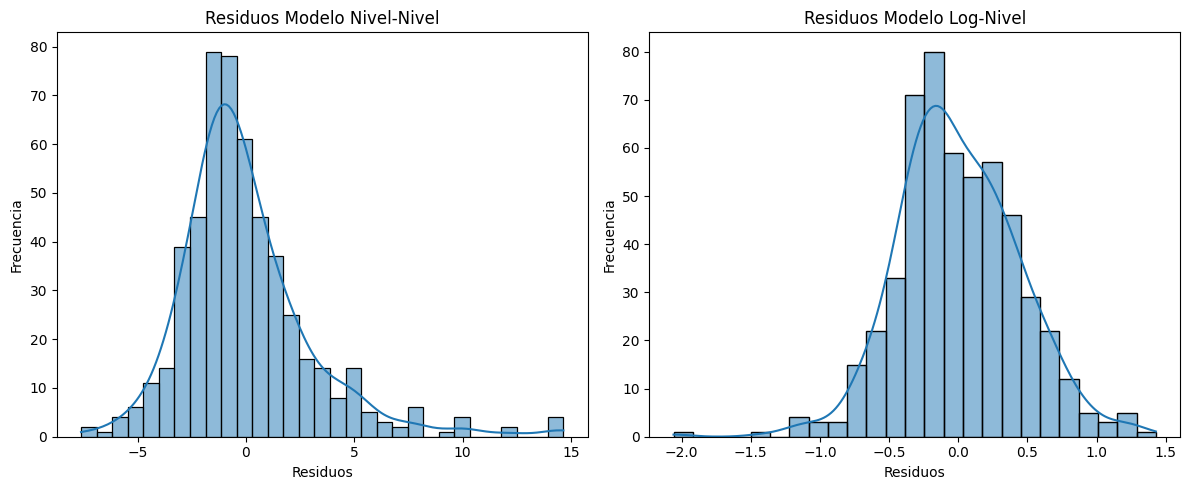

In [1]:
import wooldridge as wd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols

df = wd.data('wage1')

# Level - level model
modelo1 = ols('wage ~ educ + exper + tenure', data=df).fit()
residuos1 = modelo1.resid

# Log - level model
modelo2 = ols('np.log(wage) ~ educ + exper + tenure', data=df).fit()
residuos2 = modelo2.resid

# Histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Model 1 histogram
sns.histplot(residuos1, kde=True, ax=ax1)
ax1.set_title('Residuos Modelo Nivel-Nivel')
ax1.set_xlabel('Residuos')
ax1.set_ylabel('Frecuencia')

# model 2 histogram
sns.histplot(residuos2, kde=True, ax=ax2)
ax2.set_title('Residuos Modelo Log-Nivel')
ax2.set_xlabel('Residuos')
ax2.set_ylabel('Frecuencia')

plt.tight_layout()



Visually, the level - level model has a long right tail, which is expected in a wage variable. Transforming the dependent variable to its logarithmic form seems to correct and improve the normality (MLR 6).

In [ ]:
# Pruebas de normalidad
shapiro1 = stats.shapiro(residuos1)
shapiro2 = stats.shapiro(residuos2)

print("\nPrueba de Shapiro-Wilk para normalidad:")
print(f"Modelo nivel-nivel: estadístico={shapiro1[0]:.4f}, p-valor={shapiro1[1]:.4e}")
print(f"Modelo log-nivel: estadístico={shapiro2[0]:.4f}, p-valor={shapiro2[1]:.4e}")

# (iii) Evaluación del supuesto MLR.6
print("\nEvaluación del supuesto MLR.6:")
print("El modelo log-nivel muestra una distribución más cercana a la normal en sus residuos,")
print("lo que sugiere que cumple mejor con el supuesto MLR.6 de normalidad.")


Prueba de Shapiro-Wilk para normalidad:
Modelo nivel-nivel: estadístico=0.8932, p-valor=1.1687e-18
Modelo log-nivel: estadístico=0.9895, p-valor=7.8698e-04

Evaluación del supuesto MLR.6:
El modelo log-nivel muestra una distribución más cercana a la normal en sus residuos,
lo que sugiere que cumple mejor con el supuesto MLR.6 de normalidad.


## C2

We analyze the relation between college GPA (colgpa) and two explanatory variables: high school grades percentile (hsperc) and SAT score (sat). 
1. We will do a regression with the whole sample (4,137)
2. We will do a regression with the first half of the sample (2,070)
3. Compare the standard error between both regressions. 

it is expected that as 'n' increases, the standard error should decrease.

In [3]:
import wooldridge as woo
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [4]:
data = woo.data('gpa2')
# Regresión con todas las observaciones
X = data[['hsperc', 'sat']]
y = data['colgpa']
# Agregar el intercepto
X_const = sm.add_constant(X)

model1 = sm.OLS(y, X_const).fit()
print("Resultados con toda la muestra:")
print(model1.summary().tables[1])

# Regresión con las primeras 2,070 observaciones
X_half = X_const[:2070]
y_half = y[:2070]
model2 = sm.OLS(y_half, X_half).fit()
print("\nResultados con la primera mitad de la muestra:")
print(model2.summary().tables[1])

Resultados con toda la muestra:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3918      0.072     19.454      0.000       1.251       1.532
hsperc        -0.0135      0.001    -24.604      0.000      -0.015      -0.012
sat            0.0015   6.53e-05     22.604      0.000       0.001       0.002

Resultados con la primera mitad de la muestra:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4360      0.098     14.686      0.000       1.244       1.628
hsperc        -0.0127      0.001    -17.744      0.000      -0.014      -0.011
sat            0.0015   8.86e-05     16.578      0.000       0.001       0.002


In [6]:
se_ratio = model1.bse[1] / model2.bse[1]
theoretical_ratio = np.sqrt(2070/4137)

print("\nRatio de errores estándar (hsperc):", se_ratio)
print("Ratio teórico según la ecuación se(β̂ⱼ) = cⱼ/√n:", theoretical_ratio)



Ratio de errores estándar (hsperc): 0.7647154710870846
Ratio teórico según la ecuación se(β̂ⱼ) = cⱼ/√n: 0.7073631186179102


C:\Users\Gerardo\AppData\Local\Temp\ipykernel_5424\2663887444.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_ratio = model1.bse[1] / model2.bse[1]


## C3
In this exercise we analyze the effect of parents' education in the weight of birth of babies. 
We use the LM (lagrange multiplier) to prove if mother's and father's education are jointly significant, controlled by other factors such as cigarette consumption, birth order and family income.

H0: β_motheduc = β_fatheduc = 0

In [8]:
import wooldridge as woo
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

# Cargar los datos - método correcto
data = woo.data('bwght')

# Verificar que los datos se cargaron correctamente
print("Dimensiones del dataset:", data.shape)
print("\nPrimeras filas del dataset:")
print(data.head())

# Continuar con el análisis
variables = ['bwght', 'cigs', 'parity', 'faminc', 'motheduc', 'fatheduc']
data_clean = data[variables].dropna()

# Modelo restringido (sin motheduc y fatheduc)
X_r = sm.add_constant(data_clean[['cigs', 'parity', 'faminc']])
y = data_clean['bwght']
modelo_r = sm.OLS(y, X_r).fit()
residuos_r = modelo_r.resid

# Regresión auxiliar para el test LM
X_aux = sm.add_constant(data_clean[['cigs', 'parity', 'faminc', 'motheduc', 'fatheduc']])
modelo_aux = sm.OLS(residuos_r, X_aux).fit()

# Calcular estadístico LM
n = len(data_clean)
LM = n * modelo_aux.rsquared

# Valor crítico y p-valor
grados_libertad = 2  # número de restricciones
valor_critico = stats.chi2.ppf(0.95, grados_libertad)
p_valor = 1 - stats.chi2.cdf(LM, grados_libertad)

print(f"\nResultados del Test LM:")
print(f"Estadístico LM: {LM:.4f}")
print(f"Valor crítico (5%): {valor_critico:.4f}")
print(f"P-valor: {p_valor:.4f}")
print(f"\nConclusión: {'Rechazamos' if p_valor < 0.05 else 'No rechazamos'} H0 al nivel de significancia del 5%")


Dimensiones del dataset: (1388, 14)

Primeras filas del dataset:
   faminc  cigtax    cigprice  bwght  fatheduc  motheduc  parity  male  white  \
0    13.5    16.5  122.300003    109      12.0      12.0       1     1      1   
1     7.5    16.5  122.300003    133       6.0      12.0       2     1      0   
2     0.5    16.5  122.300003    129       NaN      12.0       2     0      0   
3    15.5    16.5  122.300003    126      12.0      12.0       2     1      0   
4    27.5    16.5  122.300003    134      14.0      12.0       2     1      1   

   cigs    lbwght  bwghtlbs  packs   lfaminc  
0     0  4.691348    6.8125    0.0  2.602690  
1     0  4.890349    8.3125    0.0  2.014903  
2     0  4.859812    8.0625    0.0 -0.693147  
3     0  4.836282    7.8750    0.0  2.740840  
4     0  4.897840    8.3750    0.0  3.314186  

Resultados del Test LM:
Estadístico LM: 2.8821
Valor crítico (5%): 5.9915
P-valor: 0.2367

Conclusión: No rechazamos H0 al nivel de significancia del 5%


In [10]:
# Comparación con el test F
X_ur = sm.add_constant(data_clean[['cigs', 'parity', 'faminc', 'motheduc', 'fatheduc']])
modelo_ur = sm.OLS(y, X_ur).fit()

R2_ur = modelo_ur.rsquared
R2_r = modelo_r.rsquared
k = X_ur.shape[1] - 1  # número de variables explicativas en modelo no restringido
q = 2  # número de restricciones

F = ((R2_ur - R2_r)/(1 - R2_ur)) * ((n-k-1)/q)

print(f"\nResultados del Test F (para comparación):")
print(f"Estadístico F: {F:.4f}")
print(f"R² no restringido: {R2_ur:.4f}")
print(f"R² restringido: {R2_r:.4f}")


Resultados del Test F (para comparación):
Estadístico F: 1.4373
R² no restringido: 0.0387
R² restringido: 0.0364


Both the F test and the LM arrive to the same conclusion. There is no evidence that parental education has an effect over weight. Also, the difference between the restricted and the unrestricted models' R²  is very small, which suggests that there is very little information lost from removing this variable, as very little variability was added to the error estimate by removing them. 

## C4
We will analyze the normality of different economic variables using different skewness metrics. Skewness is a statistical term that helps us determine how far away from a simetrical distribution is the variable, which is a fundamental characteristic in the normal distribution.

We will evaluate:
1. Income (inc) and its log transformation in the 401k dataset
2. birth weights (bwght) and its log transformation

In [11]:
import numpy as np
import pandas as pd
from wooldridge import data
import scipy.stats as stats

def calculate_skewness(data):
    """
    Calcula la medida de asimetría usando la estandarización manual
    """
    # Estandarización
    z = (data - data.mean()) / data.std()
    # Cálculo de asimetría
    return ((z**3).sum() / (len(data)-1))

In [12]:
# Cargar datos de 401k
df_401k = data('401ksubs')
# Filtrar para fsize = 1
df_401k_filtered = df_401k[df_401k['fsize'] == 1]

# Calcular asimetría para inc y log(inc)
skew_inc = calculate_skewness(df_401k_filtered['inc'])
skew_log_inc = calculate_skewness(np.log(df_401k_filtered['inc']))

# Cargar datos de peso al nacer
df_bwght = data('bwght2')

# Calcular asimetría para bwght y log(bwght)
skew_bwght = calculate_skewness(df_bwght['bwght'])
skew_log_bwght = calculate_skewness(np.log(df_bwght['bwght']))


# Imprimir resultados
print("\nResultados de asimetría:")
print(f"Ingresos (inc): {skew_inc:.4f}")
print(f"Log(ingresos): {skew_log_inc:.4f}")
print(f"Peso al nacer: {skew_bwght:.4f}")
print(f"Log(peso al nacer): {skew_log_bwght:.4f}")


Resultados de asimetría:
Ingresos (inc): 1.8632
Log(ingresos): 0.3608
Peso al nacer: -0.6005
Log(peso al nacer): -2.9502


Income reduces its skewness, while weight becomes more skewed. Logarithmic transformation should be done on variables with a large range or that are known to follow a non-linear distribution, has a right skew, has a multiplicative effect (not additive)...

Normality doesn't refer to the unconditional distribution of y or log(y), but of the residuals given x (uhat|x)
Therefore, only evaluating the distribution of y or log y isn't sufficient to verify the normality assumtion MLR 6, **we should examine the distribution of the residuals after adjusting the model**

# C5
This exercise analyzes the distribution of years of education and evaluates the CLM assumtions from the model from exercise C11 chapter 4

1. The dependent variable (educ)
2. Its distribution and normality
3. Possible violations to CLM assumptions

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from wooldridge import data

# Cargar datos
df = data('htv')

# (i) Analizar valores únicos de educación
n_valores = len(df['educ'].unique())
print(f"Número de valores únicos de educación: {n_valores}")
print("\nValores únicos de educación:")
print(sorted(df['educ'].unique()))

Número de valores únicos de educación: 15

Valores únicos de educación:
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


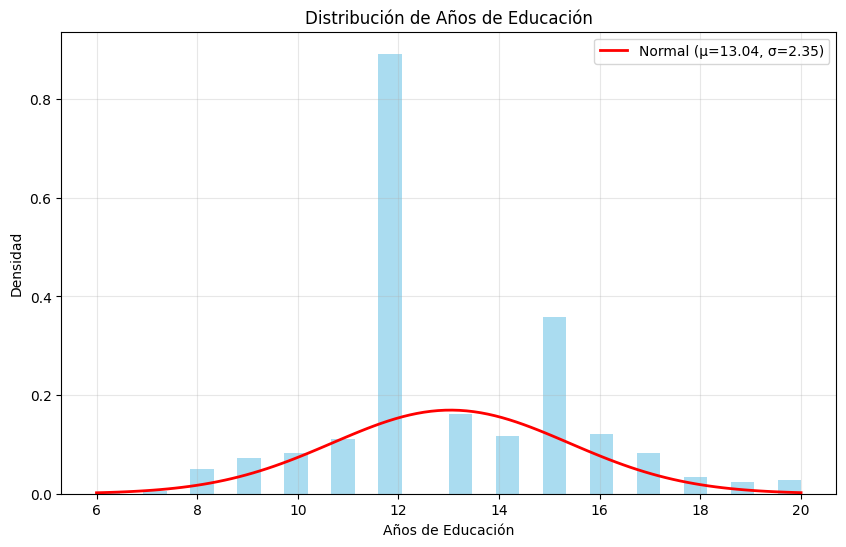

In [14]:
# (ii) Crear histograma con distribución normal superpuesta
plt.figure(figsize=(10, 6))
plt.hist(df['educ'], bins=30, density=True, alpha=0.7, color='skyblue')

# Ajustar distribución normal
mu, sigma = stats.norm.fit(df['educ'])
x = np.linspace(df['educ'].min(), df['educ'].max(), 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, 'r-', lw=2, label=f'Normal (μ={mu:.2f}, σ={sigma:.2f})')

plt.title('Distribución de Años de Educación')
plt.xlabel('Años de Educación')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
# Estadísticas descriptivas adicionales
print("\nEstadísticas descriptivas de educación:")
print(df['educ'].describe())

# Test de normalidad
stat, p_value = stats.normaltest(df['educ'])
print(f"\nTest de normalidad D'Agostino:")
print(f"Estadístico: {stat:.4f}")
print(f"P-valor: {p_value:.4f}")


Estadísticas descriptivas de educación:
count    1230.000000
mean       13.037398
std         2.354346
min         6.000000
25%        12.000000
50%        12.000000
75%        15.000000
max        20.000000
Name: educ, dtype: float64

Test de normalidad D'Agostino:
Estadístico: 43.3800
P-valor: 0.0000


The residuals seem to not have a normal distribution, however, due to the large sample size, this doesn't pose a problem for inference. However, there seems to be heteroscedasticity due to the discrete nature of the dependent variable.

# CH 6
This chapter explores changes of units of measurement, z-scores, and detailed discussion of functional forms such as log, quadratics, and interaction terms.

## C1


In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wooldridge import data
import statsmodels.api as sm


In [2]:
# Cargar los datos
df = data('kielmc')

# Mostrar las columnas disponibles
print("Columnas disponibles en el dataset:")
print(df.columns.tolist())

Columnas disponibles en el dataset:
['year', 'age', 'agesq', 'nbh', 'cbd', 'intst', 'lintst', 'price', 'rooms', 'area', 'land', 'baths', 'dist', 'ldist', 'wind', 'lprice', 'y81', 'larea', 'lland', 'y81ldist', 'lintstsq', 'nearinc', 'y81nrinc', 'rprice', 'lrprice']


In [3]:
# Filtrar datos para 1981
df_1981 = df[df['year'] == 1981].copy()
print(f"\nNúmero de observaciones en 1981: {len(df_1981)}")


Número de observaciones en 1981: 142


In [8]:
# Modelo 1: Regresión simple
X1 = df_1981['ldist']
y = df_1981['lprice']
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()

In [9]:
# Modelo 2: Regresión múltiple
X2 = df_1981[['ldist', 'lintst', 'larea', 'lland', 'rooms', 'baths', 'age']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

In [ ]:
# Modelo 2: Regresión múltiple
X2 = df_1981[['ldist', 'lintst', 'larea', 'lland', 'rooms', 'baths', 'age']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

In [10]:
# Mostrar resultados de ambos modelos
print("\nModelo 1 (Simple):")
print(model1.summary().tables[1])
print("\nModelo 2 (Múltiple):")
print(model2.summary().tables[1])


Modelo 1 (Simple):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0472      0.646     12.452      0.000       6.770       9.325
ldist          0.3649      0.066      5.548      0.000       0.235       0.495

Modelo 2 (Múltiple):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5923      0.642     11.831      0.000       6.323       8.862
ldist          0.0554      0.058      0.961      0.338      -0.059       0.169
lintst        -0.0390      0.052     -0.756      0.451      -0.141       0.063
larea          0.3193      0.076      4.178      0.000       0.168       0.470
lland          0.0768      0.040      1.945      0.054      -0.001       0.155
rooms          0.0425      0.028      1.505      0.135      -0.013       0.098
baths     

The first model suffers from omitted variables' bias. The effect of distance to the incinerator was actually capturing the effect of other characteristics that where correlated with the distance.

In [16]:

# Filtrar datos para 1981
df_1981 = df[df['year'] == 1981].copy()

# Modelo 3: Regresión con término cuadrático
X3 = df_1981[['ldist', 'lintst', 'lintstsq', 'larea', 'lland', 'rooms', 'baths', 'age']]
y = df_1981['lprice']
X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3).fit()

# Mostrar resultados
print("\nModelo 3 (Con término cuadrático):")
print(model3.summary().tables[1])


Modelo 3 (Con término cuadrático):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3171      2.646     -1.254      0.212      -8.550       1.916
ldist          0.1852      0.062      2.971      0.004       0.062       0.309
lintst         2.0728      0.501      4.138      0.000       1.082       3.064
lintstsq      -0.1193      0.028     -4.236      0.000      -0.175      -0.064
larea          0.3593      0.073      4.948      0.000       0.216       0.503
lland          0.0914      0.037      2.445      0.016       0.017       0.165
rooms          0.0381      0.027      1.431      0.155      -0.015       0.091
baths          0.1496      0.040      3.764      0.000       0.071       0.228
age           -0.0029      0.001     -2.900      0.004      -0.005      -0.001


Once the squared effect is added, lintst becomes highly significant. It has a quadratic relation, and ignoring this will produce biased estimations.

In [17]:
# Importar bibliotecas necesarias
import pandas as pd
from wooldridge import data
import statsmodels.api as sm

# Cargar los datos
df = data('kielmc')

# Filtrar datos para 1981
df_1981 = df[df['year'] == 1981].copy()

# Crear término cuadrático para ldist
df_1981['ldist_squared'] = df_1981['ldist']**2

# Modelo 4: Regresión con ambos términos cuadráticos
X4 = df_1981[['ldist', 'ldist_squared', 'lintst', 'lintstsq', 'larea', 'lland', 'rooms', 'baths', 'age']]
y = df_1981['lprice']
X4 = sm.add_constant(X4)
model4 = sm.OLS(y, X4).fit()

# Mostrar resultados
print("\nModelo 4 (Con ambos términos cuadráticos):")
print(model4.summary().tables[1])


Modelo 4 (Con ambos términos cuadráticos):
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.9212      8.295     -0.714      0.477     -22.329      10.487
ldist             0.8711      2.071      0.421      0.675      -3.225       4.967
ldist_squared    -0.0365      0.110     -0.331      0.741      -0.254       0.181
lintst            1.9340      0.654      2.956      0.004       0.640       3.228
lintstsq         -0.1107      0.038     -2.887      0.005      -0.187      -0.035
larea             0.3553      0.074      4.810      0.000       0.209       0.501
lland             0.0879      0.039      2.254      0.026       0.011       0.165
rooms             0.0381      0.027      1.424      0.157      -0.015       0.091
baths             0.1507      0.040      3.766      0.000       0.072       0.230
age              -0.0029      0.001     -2.794      0.

Once the quadratic distance to the incinerator is added as a parameter, ldist becomes less significant. This suggests that ldist doesn't have a squared relationship.

## C2

In [18]:
# Importar las bibliotecas necesarias
import wooldridge
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Cargar los datos de wage1
df = wooldridge.data('wage1')

# Crear el término cuadrático para la experiencia
df['exper2'] = df['exper']**2

# Crear el logaritmo del salario
df['log_wage'] = np.log(df['wage'])

# Estimar el modelo OLS
model = ols('log_wage ~ educ + exper + exper2', data=df).fit()

# Mostrar los resultados
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     74.67
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.38e-40
Time:                        14:41:12   Log-Likelihood:                -319.53
No. Observations:                 526   AIC:                             647.1
Df Residuals:                     522   BIC:                             664.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1280      0.106      1.208      0.2

In [19]:
# Coeficientes del modelo
beta_2 = 0.0410  # coeficiente de exper
beta_3 = -0.0007 # coeficiente de exper2

def calcular_retorno(años_experiencia):
    return 100 * (beta_2 + 2 * beta_3 * años_experiencia)

# Calcular retorno para el quinto año
retorno_5 = calcular_retorno(5)
print(f"Retorno aproximado para el 5to año: {retorno_5:.2f}%")

# Calcular retorno para el vigésimo año
retorno_20 = calcular_retorno(20)
print(f"Retorno aproximado para el 20mo año: {retorno_20:.2f}%")

Retorno aproximado para el 5to año: 3.40%
Retorno aproximado para el 20mo año: 1.30%


In [20]:
punto_inflexion = -beta_2 / (2 * beta_3)
print(f"El retorno se vuelve negativo en {punto_inflexion:.2f} años de experiencia")

# Cargar los datos para contar cuántas personas tienen más experiencia
df = wooldridge.data('wage1')
personas_mas_experiencia = len(df[df['exper'] > punto_inflexion])
print(f"\nNúmero de personas con más de {punto_inflexion:.2f} años de experiencia: {personas_mas_experiencia}")

# Estadísticas descriptivas de la experiencia
print("\nEstadísticas descriptivas de la experiencia:")
print(df['exper'].describe())

El retorno se vuelve negativo en 29.29 años de experiencia

Número de personas con más de 29.29 años de experiencia: 111

Estadísticas descriptivas de la experiencia:
count    526.00000
mean      17.01711
std       13.57216
min        1.00000
25%        5.00000
50%       13.50000
75%       26.00000
max       51.00000
Name: exper, dtype: float64


## C3

In [23]:
# Importar las bibliotecas necesarias
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar los datos WAGE2 (forma correcta)
df = woo.data('wage2')

# Crear la variable de interacción educ*exper
df['educ_exper'] = df['educ'] * df['exper']

# Crear la variable dependiente log(wage)
df['log_wage'] = np.log(df['wage'])

# Preparar las variables para la regresión
X = df[['educ', 'exper', 'educ_exper']]
X = sm.add_constant(X)
y = df['log_wage']

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()

# Mostrar los resultados
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     48.41
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           4.47e-29
Time:                        14:46:22   Log-Likelihood:                -449.87
No. Observations:                 935   AIC:                             907.7
Df Residuals:                     931   BIC:                             927.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9495      0.241     24.704      0.0

In [24]:
# Obtener los coeficientes relevantes
beta1 = modelo.params['educ']
beta3 = modelo.params['educ_exper']

print(f"β₁ (coeficiente de educación): {beta1:.4f}")
print(f"β₃ (coeficiente de interacción): {beta3:.4f}")
print("\nRetorno a la educación = {:.4f} + {:.4f}*exper".format(beta1, beta3))

β₁ (coeficiente de educación): 0.0440
β₃ (coeficiente de interacción): 0.0032

Retorno a la educación = 0.0440 + 0.0032*exper


In [25]:
# Realizar la prueba t para β₃
t_stat = modelo.tvalues['educ_exper']
p_valor = modelo.pvalues['educ_exper']

print(f"Estadístico t para β₃: {t_stat:.4f}")
print(f"Valor p: {p_valor:.4f}")

Estadístico t para β₃: 2.0946
Valor p: 0.0365


In [ ]:
# Calcular θ₁ = β₁ + 10β₃
theta1 = beta1 + 10 * beta3

# Para el intervalo de confianza, necesitamos reescribir el modelo
df['exper_menos_10'] = df['exper'] - 10
df['educ_exper_menos_10'] = df['educ'] * df['exper_menos_10']

# Ajustar el modelo transformado
X_transformed = df[['educ', 'exper_menos_10', 'educ_exper_menos_10']]
X_transformed = sm.add_constant(X_transformed)
modelo_transformed = sm.OLS(y, X_transformed).fit()

# Obtener el intervalo de confianza para θ₁
theta1_se = modelo_transformed.bse['educ']
theta1_ci = [
    theta1 - 1.96 * theta1_se,
    theta1 + 1.96 * theta1_se
]

print(f"θ₁ (retorno a la educación cuando exper = 10): {theta1:.4f}")
print(f"Intervalo de confianza del 95%: [{theta1_ci[0]:.4f}, {theta1_ci[1]:.4f}]")

θ₁ (retorno a la educación cuando exper = 10): 0.0761
Intervalo de confianza del 95%: [0.0631, 0.0890]


The return to education is the percentage increase in wages that a person can expect to earn for each additional year of schooling completed.

The base return to education (when exper = 0) is 4.40%

For each year of experience, this return increases by 0.32 percentage points

With 10 years of experience, the return to education is approximately 7.61%

We can be 95% confident that the true return to education with 10 years of experience lies between 6.31% and 8.90%


## C4

This exercise explores the relationship between SAT scores and high school class size using data from GPA2.RAW. We'll estimate a quadratic model to determine if there's an optimal high school size that maximizes SAT performance. The analysis includes both linear and logarithmic specifications of the dependent variable (SAT scores) to test the robustness of our findings.


In [28]:
import wooldridge as woo
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

# Load the data
data = woo.dataWoo('gpa2')

print(data.columns.tolist())

['sat', 'tothrs', 'colgpa', 'athlete', 'verbmath', 'hsize', 'hsrank', 'hsperc', 'female', 'white', 'black', 'hsizesq']


In [29]:
X = sm.add_constant(data[['hsize', 'hsizesq']])
model1 = sm.OLS(data['sat'], X).fit()

# Print results
print("Model 1 Results (SAT vs High School Size):")
print(model1.summary())

Model 1 Results (SAT vs High School Size):
                            OLS Regression Results                            
Dep. Variable:                    sat   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     15.93
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           1.28e-07
Time:                        16:07:04   Log-Likelihood:                -26280.
No. Observations:                4137   AIC:                         5.257e+04
Df Residuals:                    4134   BIC:                         5.258e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [30]:
# Calculate optimal size
b1 = model1.params['hsize']
b2 = model1.params['hsizesq']
optimal_size = -b1/(2*b2)
print(f"\nOptimal high school size (in hundreds): {optimal_size:.2f}")


Optimal high school size (in hundreds): 4.65


In [31]:
# Part (iv): Log model estimation
data['log_sat'] = np.log(data['sat'])
model2 = sm.OLS(data['log_sat'], X).fit()

# Print results
print("\nModel 2 Results (log(SAT) vs High School Size):")
print(model2.summary())

# Calculate optimal size for log model
b1_log = model2.params['hsize']
b2_log = model2.params['hsizesq']
optimal_size_log = -b1_log/(2*b2_log)
print(f"\nOptimal high school size (log model, in hundreds): {optimal_size_log:.2f}")


Model 2 Results (log(SAT) vs High School Size):
                            OLS Regression Results                            
Dep. Variable:                log_sat   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     16.19
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           9.89e-08
Time:                        16:09:33   Log-Likelihood:                 2332.6
No. Observations:                4137   AIC:                            -4659.
Df Residuals:                    4134   BIC:                            -4640.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

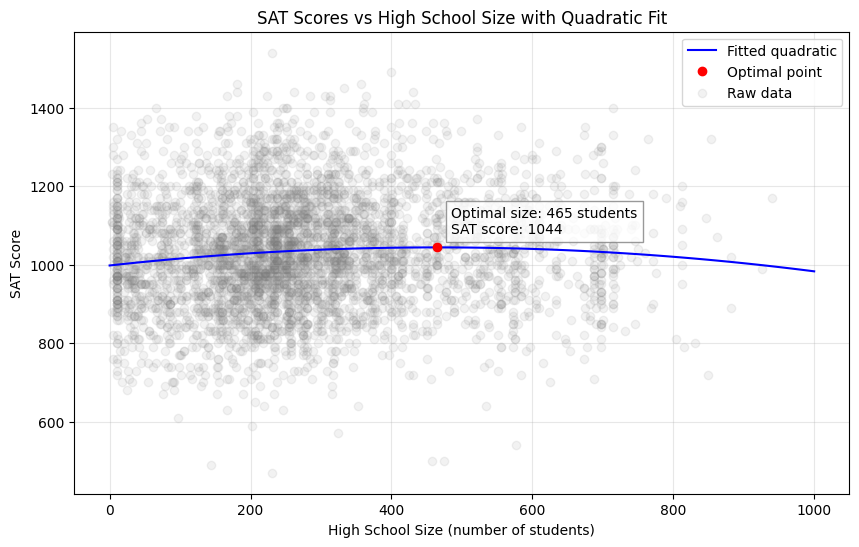

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Crear un rango de valores para hsize
hsize_range = np.linspace(0, 10, 100)  # De 0 a 1000 estudiantes (en cientos)

# Calcular los valores predichos usando los coeficientes del modelo
b0 = model1.params['const']  # Intercepto
b1 = model1.params['hsize']  # Coeficiente lineal
b2 = model1.params['hsizesq']  # Coeficiente cuadrático

predicted_sat = b0 + b1*hsize_range + b2*hsize_range**2

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar la curva cuadrática
plt.plot(hsize_range*100, predicted_sat, 'b-', label='Fitted quadratic')

# Marcar el punto óptimo
optimal_size = -b1/(2*b2)
optimal_sat = b0 + b1*optimal_size + b2*optimal_size**2
plt.plot(optimal_size*100, optimal_sat, 'ro', label='Optimal point')

# Añadir los datos originales como scatter plot
plt.scatter(data['hsize']*100, data['sat'], alpha=0.1, color='gray', label='Raw data')

# Personalizar el gráfico
plt.xlabel('High School Size (number of students)')
plt.ylabel('SAT Score')
plt.title('SAT Scores vs High School Size with Quadratic Fit')
plt.legend()
plt.grid(True, alpha=0.3)

# Añadir una anotación para el punto óptimo
plt.annotate(f'Optimal size: {optimal_size*100:.0f} students\nSAT score: {optimal_sat:.0f}',
             xy=(optimal_size*100, optimal_sat),
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))

plt.show()

i. The cuadratic term is statistically significant.

ii. The optimal school size is 465, as this is the max point after which the scores begin to lower.

iii. SAT isn't representative to all last years' students because:

    1. Selection Bias,

    2. School participation variation
    
iv. The logarithmic model is similar to the base model. Both have similar optimal points, which suggests that this analysis is robust, even though its general explicative power is low as shown by the low R^2

# C6

Housing Price Analysis with Semi-Log Model

This exercise analyzes housing prices using the HPRICE1 dataset from Wooldridge. We'll estimate a log-linear model to examine the relationship between house prices and characteristics such as lot size, square footage, and number of bedrooms. The analysis includes prediction and model comparison to understand which functional form better explains variation in housing prices.


In [33]:
# Import necessary libraries
import wooldridge as woo
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

# Load the data
data = woo.data('hprice1')

# Create log transformed variables
data['log_price'] = np.log(data['price'])
data['log_lotsize'] = np.log(data['lotsize'])
data['log_sqrft'] = np.log(data['sqrft'])

# Model 1: Log-linear model
X = sm.add_constant(data[['log_lotsize', 'log_sqrft', 'bdrms']])
y = data['log_price']

model_log = sm.OLS(y, X).fit()
print("\nLog-Linear Model Results:")
print(model_log.summary())

# Part (ii): Prediction for specific values
# Create new observation
new_values = pd.DataFrame({
    'const': [1],
    'log_lotsize': [np.log(20000)],
    'log_sqrft': [np.log(2500)],
    'bdrms': [4]
})

# Get predicted log(price)
log_price_pred = model_log.predict(new_values)

# Calculate predicted price using the correction factor
sigma2 = (model_log.resid ** 2).mean()  # estimate of error variance
price_pred = np.exp(log_price_pred) * np.exp(sigma2/2)

print("\nPrediction Results:")
print(f"Predicted log(price): {log_price_pred[0]:.4f}")
print(f"Predicted price: ${price_pred[0]:,.2f}")

# Model 2: Linear model for comparison
X_linear = sm.add_constant(data[['lotsize', 'sqrft', 'bdrms']])
y_linear = data['price']

model_linear = sm.OLS(y_linear, X_linear).fit()
print("\nLinear Model Results:")
print(model_linear.summary())


Log-Linear Model Results:
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           9.74e-19
Time:                        16:41:42   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2970 

i
- The model explains 64.3% of the variation in log(price) (R² = 0.643)
- Both lot size and square footage are highly significant (p < 0.001)
- The coefficients can be interpreted as elasticities for log-transformed variables:

- A 1% increase in lot size is associated with a 0.168% increase in price
- A 1% increase in square footage is associated with a 0.700% increase in price
- An additional bedroom is associated with a 3.7% increase in price (but not statistically significant at conventional levels, p = 0 183)

ii
For a house with:

- lotsize = 20,000
- sqrft = 2,500
- bdrms = 4

The model predicts:

- log(price) = 5.9929
- Predicted price = $407.14 thousand 

(iii) Model Comparison (Log-Linear vs Linear):

R-squared Comparison:


Linear model: R² = 0.672 (67.2%)
Log-linear model: R² = 0.643 (64.3%)


Model Diagnostics:
Linear Model:

Shows signs of multicollinearity (condition number = 64,100)
Residuals show significant non-normality (JB test p-value = 9.79e-08)
Positive skewness (0.961)

Log-Linear Model:

Better condition number (410)
Still shows non-normal residuals (JB test p-value = 2.65e-08)
Slight negative skewness (-0.188)

# C6
**Analysis of Campaign Expenditure Effects on Voting Outcomes**

This exercise analyzes how campaign expenditures affect voting outcomes using the VOTE1 dataset. We'll examine the interaction between candidates' campaign spending and their vote shares, controlling for party strength. The model includes interaction terms between expenditures and explores how changes in one candidate's spending affects their opponent's vote share. We'll also analyze alternative specifications using spending shares.


In [34]:
# Import necessary libraries
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the VOTE1 dataset
data = woo.data('vote1')

# Create interaction term
data['expendA_expendB'] = data['expendA'] * data['expendB']

# Model 1: With interaction term
X = sm.add_constant(data[['prtystrA', 'expendA', 'expendB', 'expendA_expendB']])
y = data['voteA']

# Fit the model
model1 = sm.OLS(y, X).fit()

# Print results
print(model1.summary())

# Calculate average expendA
avg_expendA = data['expendA'].mean()
print("\nAverage expendA:", avg_expendA)

# Model 2: With shareA
# Calculate shareA
data['shareA'] = data['expendA'] / (data['expendA'] + data['expendB'])

# Fit model with shareA instead of interaction
X2 = sm.add_constant(data[['prtystrA', 'expendA', 'expendB', 'shareA']])
model2 = sm.OLS(y, X2).fit()

print("\nModel with shareA:")
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     55.86
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           6.77e-30
Time:                        16:51:45   Log-Likelihood:                -659.75
No. Observations:                 173   AIC:                             1329.
Df Residuals:                     168   BIC:                             1345.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              32.1174      4.591     

Test F de significancia conjunta para expendB y su interacción:
<F test: F=68.06976473972558, p=2.227709760311783e-22, df_denom=168, df_num=2>

Efectos marginales en puntos específicos:

En expendA = 0.30:
Efecto Marginal = -0.0317
Error Estándar = 0.0046
Estadístico t = -6.9181
Valor p = 0.0000

En expendA = 310.61:
Efecto Marginal = -0.0338
Error Estándar = 0.0032
Estadístico t = -10.4212
Valor p = 0.0000

En expendA = 1470.67:
Efecto Marginal = -0.0415
Error Estándar = 0.0077
Estadístico t = -5.3799
Valor p = 0.0000


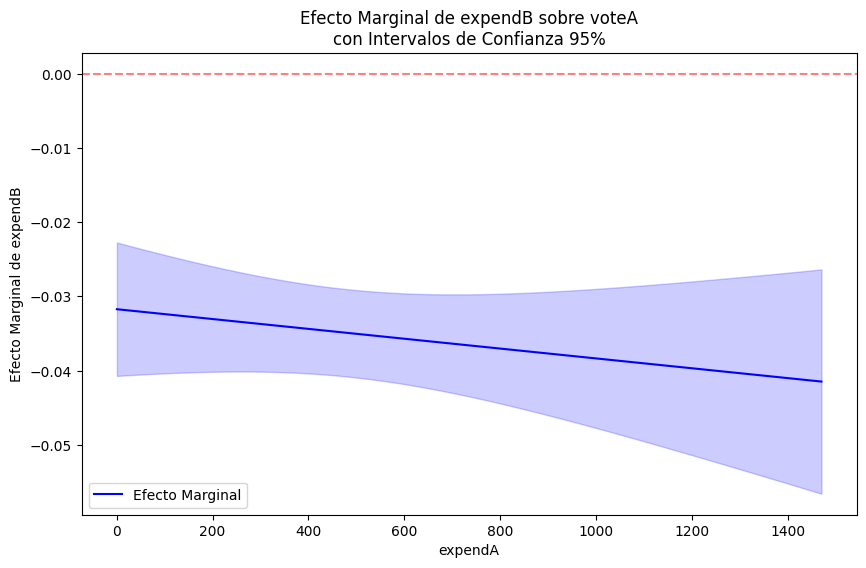

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

# Asumiendo que ya tenemos el modelo1 del código anterior
# Realizamos el test F para expendB y su interacción

# 1. Test de significancia conjunta
# Creamos la matriz de restricciones para expendB y expendA_expendB
R = np.array([[0, 0, 0, 1, 0],  # expendB
              [0, 0, 0, 0, 1]]) # expendA_expendB
              
# Realizamos el test F
f_test = model1.f_test(R)

# 2. Calculamos el efecto marginal en diferentes niveles de expendA
# Usamos un rango de valores de expendA
expendA_range = np.linspace(data['expendA'].min(), data['expendA'].max(), 100)

# Obtenemos los coeficientes y su matriz de covarianza
beta_expendB = model1.params['expendB']
beta_interaction = model1.params['expendA_expendB']
cov = model1.cov_params().loc[['expendB', 'expendA_expendB'], ['expendB', 'expendA_expendB']]

# Calculamos el efecto marginal y su error estándar para cada valor de expendA
marginal_effects = []
std_errors = []

for exp_a in expendA_range:
    # Efecto marginal
    marg_effect = beta_expendB + beta_interaction * exp_a
    
    # Error estándar del efecto marginal
    var = (cov.iloc[0,0] + 
           exp_a**2 * cov.iloc[1,1] + 
           2 * exp_a * cov.iloc[0,1])
    se = np.sqrt(var)
    
    marginal_effects.append(marg_effect)
    std_errors.append(se)

# Convertimos a arrays de numpy
marginal_effects = np.array(marginal_effects)
std_errors = np.array(std_errors)

# Calculamos intervalos de confianza (95%)
ci_lower = marginal_effects - 1.96 * std_errors
ci_upper = marginal_effects + 1.96 * std_errors

# Creamos el gráfico
plt.figure(figsize=(10, 6))
plt.plot(expendA_range, marginal_effects, 'b-', label='Efecto Marginal')
plt.fill_between(expendA_range, ci_lower, ci_upper, alpha=0.2, color='b')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.xlabel('expendA')
plt.ylabel('Efecto Marginal de expendB')
plt.title('Efecto Marginal de expendB sobre voteA\ncon Intervalos de Confianza 95%')
plt.legend()

# Imprimir resultados del test F
print("Test F de significancia conjunta para expendB y su interacción:")
print(f_test.summary())

# Calcular el efecto marginal en algunos puntos específicos
points_of_interest = [data['expendA'].min(), data['expendA'].mean(), data['expendA'].max()]
print("\nEfectos marginales en puntos específicos:")
for exp_a in points_of_interest:
    idx = np.abs(expendA_range - exp_a).argmin()
    me = marginal_effects[idx]
    se = std_errors[idx]
    t_stat = me / se
    p_val = 2 * (1 - stats.t.cdf(abs(t_stat), model1.df_resid))
    print(f"\nEn expendA = {exp_a:.2f}:")
    print(f"Efecto Marginal = {me:.4f}")
    print(f"Error Estándar = {se:.4f}")
    print(f"Estadístico t = {t_stat:.4f}")
    print(f"Valor p = {p_val:.4f}")

plt.show()

(i) The partial effects are:

For expendB: ∂voteA/∂expendB = -0.0317 - (6.629e-06)×expendA

For expendA: ∂voteA/∂expendA = 0.0383 - (6.629e-06)×expendB

The negative sign for β₄ (expendA_expendB) suggests that increased spending by one candidate diminishes the effectiveness of the other candidate's


(ii) Although the interaction term alone is not statistically significant (t = -0.923, p = 0.358), the joint F-test for expendB and its interaction with expendA (F = 68.07, p < 0.001) indicates that they are jointly significant. The marginal effects are statistically significant across all levels of expendA, confirming a meaningful interaction between campaign expenditures.

(iii) With expendA fixed at 300:
∂voteA/∂expendB = -0.0317 - (6.629e-06×300) = -0.0337

For a $100,000 increase in expendB, the effect would be:
-0.0337 × 100 = -3.37 percentage points in voteA
This is a substantial effect, considering typical margins in elections.

(iv) With expendB fixed at 100:
∂voteA/∂expendA = 0.0383 - (6.629e-06×100) = 0.0376

For a $100,000 increase in expendA:
0.0376 × 100 = 3.76 percentage points increase in voteA
This makes sense as increased spending by candidate A positively affects their vote share.

(v) It doesn't make sense to hold both expendA and expendB fixed while changing shareA, as shareA is directly calculated from these values. shareA = expendA/(expendA + expendB)



## C7
This exercise examines the relationship between class attendance and student performance using the ATTEND dataset. We analyze a multiple regression model that includes student attendance rates, prior GPA, ACT scores, and their interactions to determine their effects on standardized final exam scores. The model includes quadratic terms and interaction effects to capture nonlinear relationships between these variables.



In [36]:
# Import necessary libraries
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the data
data = woo.data('attend')

# Create the variables needed for the regression
data['priGPA2'] = data['priGPA']**2
data['ACT2'] = data['ACT']**2
data['priGPA_atndrte'] = data['priGPA'] * data['atndrte']

# Add constant
X = sm.add_constant(data[['atndrte', 'priGPA', 'ACT', 
                         'priGPA2', 'ACT2', 'priGPA_atndrte']])

# Fit the model
model = sm.OLS(data['stndfnl'], X)
results = model.fit()

# Print results
print(results.summary())

# Calculate partial effect when priGPA = 2.59 and atndrte = 82
priGPA_mean = 2.59
atndrte_mean = 82

                            OLS Regression Results                            
Dep. Variable:                stndfnl   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     33.25
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           3.49e-35
Time:                        17:14:23   Log-Likelihood:                -868.90
No. Observations:                 680   AIC:                             1752.
Df Residuals:                     673   BIC:                             1783.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.0503      1.360      1.

In [37]:
partial_effect = (results.params['priGPA'] + 
                 2 * results.params['priGPA2'] * priGPA_mean + 
                 results.params['priGPA_atndrte'] * atndrte_mean)

print("\nPartial effect at means:", partial_effect)


Partial effect at means: 0.36229028965214927


In [38]:
# Create centered variables
data['priGPA_centered2'] = (data['priGPA'] - 2.59)**2
data['atndrte_centered'] = data['atndrte'] - 82
data['priGPA_atndrte_centered'] = data['priGPA'] * data['atndrte_centered']

# Fit the transformed model
X_transformed = sm.add_constant(data[['atndrte', 'priGPA', 'ACT', 
                                    'priGPA_centered2', 'ACT2', 
                                    'priGPA_atndrte_centered']])

model_transformed = sm.OLS(data['stndfnl'], X_transformed)
results_transformed = model_transformed.fit()

print("\nTransformed model results:")
print(results_transformed.summary())


Transformed model results:
                            OLS Regression Results                            
Dep. Variable:                stndfnl   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     33.25
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           3.49e-35
Time:                        17:16:18   Log-Likelihood:                -868.90
No. Observations:                 680   AIC:                             1752.
Df Residuals:                     673   BIC:                             1783.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [39]:
# Create double-centered interaction
data['priGPA_atndrte_double_centered'] = (data['priGPA'] - 2.59) * (data['atndrte'] - 82)

X_double_centered = sm.add_constant(data[['atndrte', 'priGPA', 'ACT', 
                                        'priGPA_centered2', 'ACT2', 
                                        'priGPA_atndrte_double_centered']])

model_double_centered = sm.OLS(data['stndfnl'], X_double_centered)
results_double_centered = model_double_centered.fit()

print("\nDouble-centered model results:")
print(results_double_centered.summary())


Double-centered model results:
                            OLS Regression Results                            
Dep. Variable:                stndfnl   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     33.25
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           3.49e-35
Time:                        17:16:37   Log-Likelihood:                -868.90
No. Observations:                 680   AIC:                             1752.
Df Residuals:                     673   BIC:                             1783.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

i. We estimated the model 

stndfnl = β₀ + β₁atndrte + β₂priGPA + β₃ACT + β₄priGPA² + β₅ACT² + β₆priGPA·atndrte

- The individual coefficients of atndrte and priGPA.attndrte aren't significant individually, but they are jointly significant.

ii. The partial effect  ∂stndfnl/∂priGPA = β₂ + 2β₄·priGPA + β₆·atndrte. Evaluating at priGPA = 2.59 and atndrte = 82, we obtain a partial effect of 0.3623. Increasing the previous GPA by 1 point improves the final score by .36 standard deviations.

iii. Recentering the model allows us to obtain directly the standard error of the partial effect


## C8

This exercise uses the HPRICE1 dataset to estimate a multiple regression model for house prices. We'll analyze the relationship between house prices and characteristics such as lot size, square footage, and number of bedrooms. The analysis includes point estimation, prediction intervals, and confidence intervals for future house prices. We'll use the specification:

price = β₀ + β₁lotsize + β₂sqrft + β₃bdrms + u

In [49]:
# Import necessary libraries
import wooldridge as woo
import statsmodels.api as sm
import numpy as np
import pandas as pd
from scipy import stats

# Load the data
data = woo.data('hprice1')

# Prepare the variables
X = data[['lotsize', 'sqrft', 'bdrms']]
X = sm.add_constant(X)
y = data['price']

# Fit the model
model = sm.OLS(y, X).fit()

# Create prediction data for the specific house
predict_data = pd.DataFrame({
    'const': [1],
    'lotsize': [10000],
    'sqrft': [2300],
    'bdrms': [4]
})

# Get point prediction
point_pred = model.predict(predict_data)

# Calculate prediction interval
X_pred = predict_data.values  # Convert to numpy array
X_orig = X.values  # Convert original X to numpy array
mse = model.mse_resid

# Calculate variance of prediction
X_pred_var = mse * (1 + X_pred.dot(np.linalg.inv(X_orig.T.dot(X_orig))).dot(X_pred.T))
pred_se = np.sqrt(X_pred_var[0,0])

# Get degrees of freedom
df = model.df_resid

# Calculate t-critical value for 95% confidence
t_crit = stats.t.ppf(0.975, df)

# Calculate prediction interval
pred_lower = point_pred - t_crit * pred_se
pred_upper = point_pred + t_crit * pred_se

print("\nResultados de la predicción:")
print(f"Precio predicho: ${round(point_pred[0], 2):,.2f}")
print(f"\nIntervalo de predicción del 95%:")
print(f"Límite inferior: ${round(pred_lower[0], 2):,.2f}")
print(f"Límite superior: ${round(pred_upper[0], 2):,.2f}")

# También calculemos el error estándar de la media condicional
mean_se = np.sqrt(mse * X_pred.dot(np.linalg.inv(X_orig.T.dot(X_orig))).dot(X_pred.T))[0,0]
mean_lower = point_pred - t_crit * mean_se
mean_upper = point_pred + t_crit * mean_se

print(f"\nIntervalo de confianza del 95% para la media condicional:")
print(f"Límite inferior: ${round(mean_lower[0], 2):,.2f}")
print(f"Límite superior: ${round(mean_upper[0], 2):,.2f}")


Resultados de la predicción:
Precio predicho: $336.71

Intervalo de predicción del 95%:
Límite inferior: $216.82
Límite superior: $456.59

Intervalo de confianza del 95% para la media condicional:
Límite inferior: $322.04
Límite superior: $351.37


In [50]:
# Imprimir el resumen del modelo
print("Resumen del Modelo de Regresión:")
print(model.summary())

# Luego los resultados de predicción como antes...


Resumen del Modelo de Regresión:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           2.70e-20
Time:                        17:46:22   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.77

i

price = -21.77 + 0.0021lotsize + 0.1228sqrft + 13.8525*bdrms

Standard Error of the Regression= 59.94

For lotsize=10000, sqrft=2300, bdrms=4:
Predicted price = $336,710

ii

The confidence interval for the conditional mean: [$322,040, $351,370]

iii 

The confidence interval for the prediction: [$216,820, $456,590]

The prediction interval is always broader because it includes both the individual variation and σ²

## C8

This analysis explores the relationship between NBA players' performance metrics and their salaries using the NBASAL dataset from Wooldridge. We investigate how points per game are influenced by experience (including quadratic effects), age, and college years. Additionally, we examine wage determinants considering both performance and player characteristics. The analysis includes multiple regression specifications and statistical tests to understand the factors affecting both player performance and compensation in the NBA.


In [53]:
# Import necessary libraries
import wooldridge as woo
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Load the data
nba = woo.data('nbasal')

# (i) First regression: points vs experience (quadratic), age, and college years
X = nba[['exper', 'age', 'coll']]
X['exper2'] = nba['exper']**2
X = sm.add_constant(X)
y = nba['points']

model1 = sm.OLS(y, X).fit()
print("Model 1: Points per Game")
print(model1.summary())

# (ii) Calculate the experience turning point
beta_exper = model1.params['exper']
beta_exper2 = model1.params['exper2']
turning_point = -beta_exper/(2*beta_exper2)
print("\nTurning point for experience:", turning_point)

# (iv) Add age squared
X['age2'] = nba['age']**2
model2 = sm.OLS(y, X).fit()
print("\nModel 2: Points per Game (with age squared)")
print(model2.summary())

# Test for joint significance of age and age^2
r_matrix_age = np.zeros((2, len(model2.params)))
r_matrix_age[0, X.columns.get_loc('age')] = 1
r_matrix_age[1, X.columns.get_loc('age2')] = 1

f_test_age = model2.f_test(r_matrix_age)
print("\nJoint F-test for age and age squared:")
print(f_test_age)

# (v) Log wage regression
X = nba[['points', 'exper', 'age', 'coll']]
X['exper2'] = nba['exper']**2
X = sm.add_constant(X)
y = np.log(nba['wage'])

model3 = sm.OLS(y, X).fit()
print("\nModel 3: Log Wage")
print(model3.summary())

# (vi) Joint significance test for age and college
r_matrix = np.zeros((2, len(model3.params)))
r_matrix[0, X.columns.get_loc('age')] = 1
r_matrix[1, X.columns.get_loc('coll')] = 1

f_test = model3.f_test(r_matrix)
print("\nJoint F-test for age and college:")
print(f_test)

Model 1: Points per Game
                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     10.85
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           3.69e-08
Time:                        18:12:39   Log-Likelihood:                -838.21
No. Observations:                 269   AIC:                             1686.
Df Residuals:                     264   BIC:                             1704.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.2183      

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_15784\325075305.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['exper2'] = nba['exper']**2
C:\Users\Gerardo\AppData\Local\Temp\ipykernel_15784\325075305.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['exper2'] = nba['exper']**2


**Performance Model (Points per Game):**
- Experience shows an inverted U-shaped relationship, peaking at 15.3 years
- College years have a significant negative effect (-1.29 points per game)
- The quadratic term for age proved unnecessary despite joint significance (R^2 didn't improve, and strong multicolineality)

**Salary Model (Log Wage):**
- Points per game strongly influence salary (coefficient: 0.078)
- Experience shows diminishing returns
- Age and college years have no significant independent effect on salary once controlling for performance and experience (F-test p-value: 0.306)




## C10
This analysis explores the relationship between infant birth weight, number of prenatal visits, and mother's age using data from BWGHT2. We'll investigate potential nonlinear relationships using quadratic specifications, determine optimal values for prenatal visits and mother's age, and compare different functional forms for birth weight modeling.

Initial data shape: (1832, 23)

Missing values:
bwght     0
npvis    68
mage      0
dtype: int64

Final data shape: (1764, 23)

Model 1 Results (log(bwght) on npvis and npvis^2):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9579      0.027    291.364      0.000       7.904       8.011
npvis          0.0189      0.004      5.140      0.000       0.012       0.026
npvissq       -0.0004      0.000     -3.573      0.000      -0.001      -0.000

Optimal number of prenatal visits: 22.06
Number of women with 22+ visits: 19

Model 2 Results (adding mother's age):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5837      0.137     55.333      0.000       7.315       7.853
npvis          0.0180      0.004      4.864      0.000       0.011     

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_15784\2409612022.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  npvis_optimal = -model1.params[1]/(2*model1.params[2])
C:\Users\Gerardo\AppData\Local\Temp\ipykernel_15784\2409612022.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_optimal = -model2.params[3]/(2*model2.params[4])


Number of women above optimal age: 720
Percentage of women above optimal age: 40.82%

R-squared comparison:
Log specification R-squared: 0.0256
Level specification R-squared: 0.0192


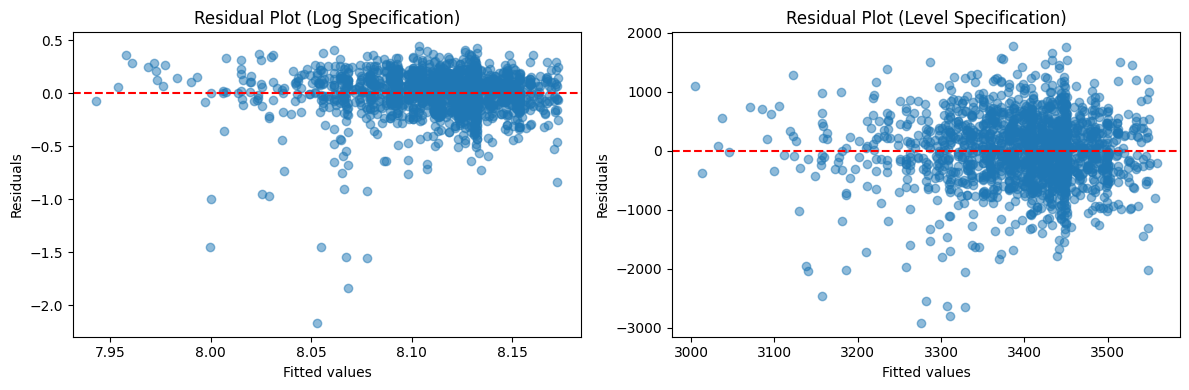

In [57]:
# Import necessary libraries
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
data = woo.data('bwght2')

# Check for missing or infinite values
print("Initial data shape:", data.shape)
print("\nMissing values:")
print(data[['bwght', 'npvis', 'mage']].isnull().sum())

# Clean the data
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['bwght', 'npvis', 'mage'])

print("\nFinal data shape:", data.shape)

# Create transformed variables
data['log_bwght'] = np.log(data['bwght'])
data['mage2'] = data['mage']**2  # Square of mother's age

# Part i: Estimate log(bwght) on npvis and npvis^2
X1 = sm.add_constant(data[['npvis', 'npvissq']])
y = data['log_bwght']

model1 = sm.OLS(y, X1).fit()
print("\nModel 1 Results (log(bwght) on npvis and npvis^2):")
print(model1.summary().tables[1])

# Part ii: Find maximum point and count observations
npvis_optimal = -model1.params[1]/(2*model1.params[2])
print(f"\nOptimal number of prenatal visits: {npvis_optimal:.2f}")
print(f"Number of women with {int(npvis_optimal)}+ visits: {(data['npvis'] >= npvis_optimal).sum()}")

# Part iv: Add mother's age quadratic terms
X2 = sm.add_constant(data[['npvis', 'npvissq', 'mage', 'mage2']])
model2 = sm.OLS(y, X2).fit()
print("\nModel 2 Results (adding mother's age):")
print(model2.summary().tables[1])

age_optimal = -model2.params[3]/(2*model2.params[4])
print(f"\nOptimal mother's age: {age_optimal:.2f}")
print(f"Number of women above optimal age: {(data['mage'] > age_optimal).sum()}")
print(f"Percentage of women above optimal age: {(data['mage'] > age_optimal).mean()*100:.2f}%")

# Part vi: Compare log vs level specification
# Model with level of bwght
y_level = data['bwght']
model_level = sm.OLS(y_level, X2).fit()

# Calculate R-squared for comparison
print("\nR-squared comparison:")
print(f"Log specification R-squared: {model2.rsquared:.4f}")
print(f"Level specification R-squared: {model_level.rsquared:.4f}")

# Additional diagnostic plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(model2.fittedvalues, model2.resid, alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Log Specification)')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(model_level.fittedvalues, model_level.resid, alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Level Specification)')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

## C11

This exercise analyzes the relationship between eco-friendly and regular apple prices and their impact on the pounds of eco-friendly apples purchased. Using the APPLE dataset from Wooldridge, we'll examine how price elasticities affect consumer behavior, control for demographic variables, and compare simple versus multiple regression results to understand potential multicollinearity issues.



In [58]:
# Import necessary libraries
import wooldridge as woo
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Load the data
data = woo.data('apple')

# (i) Run the initial regression
X = data[['ecoprc', 'regprc']]
X = sm.add_constant(X)
y = data['ecolbs']

# Fit the model
model1 = sm.OLS(y, X).fit()
print(model1.summary())

# (iii) Calculate range of fitted values
fitted_values = model1.fittedvalues
print("\nRange of fitted values:")
print(f"Min: {fitted_values.min():.4f}")
print(f"Max: {fitted_values.max():.4f}")
print(f"\nFraction of sample with ecolbs = 0: {(data['ecolbs'] == 0).mean():.4f}")

# (v) Extended model with additional variables
X_extended = data[['ecoprc', 'regprc', 'faminc', 'hhsize', 'educ', 'age']]
X_extended = sm.add_constant(X_extended)
model2 = sm.OLS(y, X_extended).fit()

# F-test for joint significance of new variables
from scipy import stats
restricted_ssr = sum(model1.resid**2)
unrestricted_ssr = sum(model2.resid**2)
n = len(y)
k_restricted = 3  # including constant
k_unrestricted = 7  # including constant
f_stat = ((restricted_ssr - unrestricted_ssr)/(k_unrestricted-k_restricted)) / (unrestricted_ssr/(n-k_unrestricted))
p_value = 1 - stats.f.cdf(f_stat, k_unrestricted-k_restricted, n-k_unrestricted)

print("\nF-test for joint significance of additional variables:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# (vi) Simple regressions
simple_eco = sm.OLS(y, sm.add_constant(data['ecoprc'])).fit()
simple_reg = sm.OLS(y, sm.add_constant(data['regprc'])).fit()

print("\nSimple regression results:")
print("\nEcoprc coefficient:")
print(simple_eco.params['ecoprc'])
print("\nRegprc coefficient:")
print(simple_reg.params['regprc'])

# Correlation between prices
correlation = data['ecoprc'].corr(data['regprc'])
print(f"\nCorrelation between ecoprc and regprc: {correlation:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 ecolbs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     12.41
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           5.11e-06
Time:                        18:42:06   Log-Likelihood:                -1535.3
No. Observations:                 660   AIC:                             3077.
Df Residuals:                     657   BIC:                             3090.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9653      0.380      5.171      0.0

- Prices significantly affect eco-friendly apple purchases: eco-friendly apple price has a negative effect (-2.93 lbs per dollar), while regular apple price has a positive effect (3.03 lbs per dollar)
- Despite statistical significance, the model's explanatory power is weak (R² = 0.036), suggesting prices alone explain only 3.6% of variation in eco-friendly apple purchases
- Demographic variables (income, household size, education, age) do not significantly improve the model's explanatory power
- High correlation between eco-friendly and regular apple prices (0.83) indicates multicollinearity, explaining the substantial differences between simple and multiple regression coefficients


## C12
This exercise analyzes the relationship between net total financial assets (nettfa), income (inc), and age for single-person households using the 401KSUBS dataset. We'll examine quadratic relationships in age, controlling for income, and evaluate various model specifications to understand how age and income affect financial assets. The analysis is restricted to households with family size (fsize) equal to 1.


Youngest age: 25
Number of people at youngest age: 99

Model 1 Results:
                            OLS Regression Results                            
Dep. Variable:                 nettfa   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     93.99
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           6.30e-57
Time:                        18:48:56   Log-Likelihood:                -10520.
No. Observations:                2017   AIC:                         2.105e+04
Df Residuals:                    2013   BIC:                         2.107e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

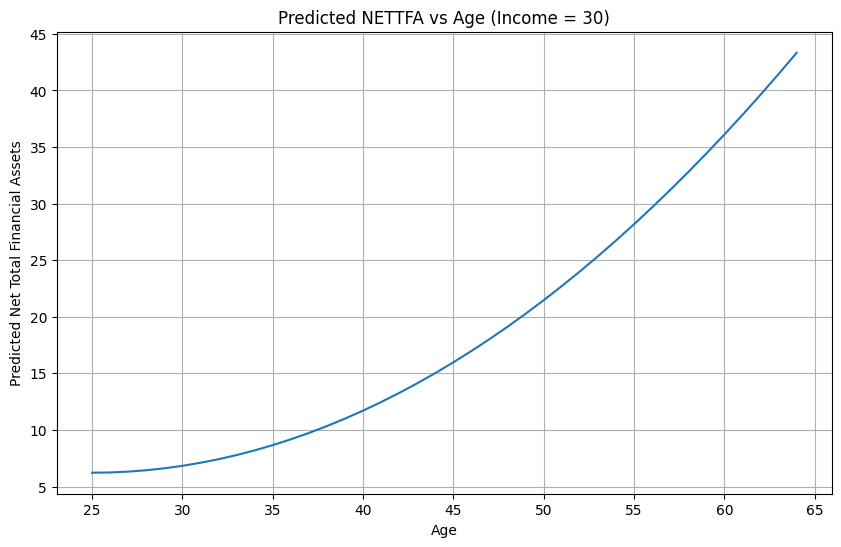


Model 4 Results (with quadratic income):
                            OLS Regression Results                            
Dep. Variable:                 nettfa   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     94.01
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           6.13e-57
Time:                        18:48:58   Log-Likelihood:                -10520.
No. Observations:                2017   AIC:                         2.105e+04
Df Residuals:                    2013   BIC:                         2.107e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const   

In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np
from wooldridge import data
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Load the data
df = data('401ksubs')

# Filter for single-person households
df_single = df[df['fsize'] == 1].copy()

# Part (i): Find youngest age and count
youngest_age = df_single['age'].min()
count_youngest = df_single[df_single['age'] == youngest_age].shape[0]
print(f"Youngest age: {youngest_age}")
print(f"Number of people at youngest age: {count_youngest}")

# Part (ii) and (iii): Estimate the initial model
X = df_single[['inc', 'age']]
X = sm.add_constant(X)
X['age2'] = df_single['age']**2
y = df_single['nettfa']

model1 = sm.OLS(y, X).fit()
print("\nModel 1 Results:")
print(model1.summary())

# Part (iv): Calculate θ₂ and its p-value
# We'll reparametrize the model
df_single['age_diff_sq'] = (df_single['age'] - 25)**2
X2 = df_single[['inc', 'age', 'age_diff_sq']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
print("\nModel 2 Results (reparametrized):")
print(model2.summary())

# Part (v): Estimate the restricted model
X3 = df_single[['inc', 'age_diff_sq']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3).fit()
print("\nModel 3 Results (restricted):")
print(model3.summary())

# Part (vi): Create visualization
ages = np.arange(25, 65)
predicted_nettfa = (model3.params['const'] + 
                   model3.params['inc'] * 30 + 
                   model3.params['age_diff_sq'] * (ages - 25)**2)

plt.figure(figsize=(10, 6))
plt.plot(ages, predicted_nettfa)
plt.xlabel('Age')
plt.ylabel('Predicted Net Total Financial Assets')
plt.title('Predicted NETTFA vs Age (Income = 30)')
plt.grid(True)
plt.show()

# Part (vii): Test for quadratic income term
df_single['inc2'] = df_single['inc']**2
X4 = df_single[['inc', 'inc2', 'age_diff_sq']]
X4 = sm.add_constant(X4)
model4 = sm.OLS(y, X4).fit()
print("\nModel 4 Results (with quadratic income):")
print(model4.summary())

The youngest age in the sample is 25 years old, with 99 individuals at this age.
Age has a quadratic relationship with net total financial assets:

Assets reach their minimum around age 25
After 25, assets increase at an accelerating rate with age


Income has a strong positive linear relationship with net total financial assets:

Each additional thousand dollars of income increases nettfa by $824
No evidence for a quadratic income effect (p-value = 0.785)


Model fit:

R² = 0.123, indicating the model explains 12.3% of variation in nettfa
The most parsimonious model uses income and (age-25)² as predictors
All coefficients in the final model are highly significant (p < 0.001)


Key equation:
nettfa = -18.49 + 0.824×inc + 0.024×(age-25)²

## C13

This exercise analyzes the relationship between fourth-grade math performance (math4) and various school characteristics using the MEAP00 dataset. We investigate how per-pupil spending (lexppp), school enrollment (lenroll), and the percentage of students eligible for free lunch (lunch) affect math pass rates. The analysis includes basic OLS regression, examination of fitted values and residuals, testing for non-linear relationships through quadratic terms, and standardized regression to compare effect sizes across variables.


In [64]:
# First cell - Import necessary libraries
import wooldridge
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Load the data
data = wooldridge.data('meap00_01')

# Display first few rows and basic info to verify the data
print("Dataset Info:")
print(data.info())
print("\nFirst few rows:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dcode    1692 non-null   float64
 1   bcode    1692 non-null   int64  
 2   math4    1692 non-null   float64
 3   read4    1692 non-null   float64
 4   lunch    1692 non-null   float64
 5   enroll   1692 non-null   int64  
 6   exppp    1692 non-null   float64
 7   lenroll  1692 non-null   float64
 8   lexppp   1692 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 119.1 KB
None

First few rows:
    dcode  bcode      math4      read4      lunch  enroll        exppp  \
0  1010.0   4937  83.300003  77.800003  40.599998     468  5870.672852   
1  3010.0    790  85.699997  60.000000  12.750000     251  4824.836426   
2  3010.0   1403  77.300003  59.099998  17.080000     439  4358.771973   
3  3010.0   4056  85.199997  67.000000  23.170000     561  4701.395508   
4  3020.0    922  

In [65]:
# Part (i): Basic OLS regression
X = data[['lexppp', 'lenroll', 'lunch']]
X = sm.add_constant(X)
y = data['math4']

# Run OLS regression
model = sm.OLS(y, X)
results = model.fit()
print("Part (i) - OLS Regression Results:")
print(results.summary().tables[1])  # Print coefficients table

# Part (ii): Analyze fitted values
fitted_values = results.fittedvalues
print("\nPart (ii) - Fitted Values Analysis:")
print(f"Range of fitted values: [{fitted_values.min():.2f}, {fitted_values.max():.2f}]")
print(f"Range of actual math4: [{y.min():.2f}, {y.max():.2f}]")

# Part (iii): Analyze residuals
residuals = results.resid
max_residual_idx = residuals.idxmax()
print("\nPart (iii) - Residual Analysis:")
print(f"School code with largest positive residual: {data.loc[max_residual_idx, 'bcode']}")
print(f"Residual value: {residuals[max_residual_idx]:.2f}")

# Part (iv): Add quadratic terms
X_quad = X.copy()
X_quad['lexppp2'] = data['lexppp']**2
X_quad['lenroll2'] = data['lenroll']**2
X_quad['lunch2'] = data['lunch']**2

# Run regression with quadratic terms
model_quad = sm.OLS(y, X_quad)
results_quad = model_quad.fit()

# F-test for joint significance of quadratic terms
from scipy import stats

# Restricted RSS (original model)
rss_restricted = sum(results.resid**2)
# Unrestricted RSS (model with quadratic terms)
rss_unrestricted = sum(results_quad.resid**2)
n = len(y)  # number of observations
k = len(X.columns)  # number of parameters in restricted model
q = 3  # number of restrictions (quadratic terms)

f_stat = ((rss_restricted - rss_unrestricted)/q) / (rss_unrestricted/(n-k-q))
p_value = 1 - stats.f.cdf(f_stat, q, n-k-q)

print("\nPart (iv) - Test for Quadratic Terms:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Part (v): Standardized regression
data_std = data[['math4', 'lexppp', 'lenroll', 'lunch']].apply(lambda x: (x - x.mean()) / x.std())
X_std = data_std[['lexppp', 'lenroll', 'lunch']]
X_std = sm.add_constant(X_std)
y_std = data_std['math4']

model_std = sm.OLS(y_std, X_std)
results_std = model_std.fit()

print("\nPart (v) - Standardized Regression Results:")
print(results_std.summary().tables[1])  # Print coefficients table

Part (i) - OLS Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.9325     19.962      4.605      0.000      52.780     131.085
lexppp         3.5247      2.098      1.680      0.093      -0.590       7.639
lenroll       -5.3992      0.940     -5.741      0.000      -7.244      -3.555
lunch         -0.4487      0.015    -30.648      0.000      -0.477      -0.420

Part (ii) - Fitted Values Analysis:
Range of fitted values: [42.41, 92.67]
Range of actual math4: [0.00, 100.00]

Part (iii) - Residual Analysis:
School code with largest positive residual: 1141
Residual value: 51.42

Part (iv) - Test for Quadratic Terms:
F-statistic: 0.5180
p-value: 0.6699

Part (v) - Standardized Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Socioeconomic factors, as measured by free lunch eligibility, have the strongest impact on math performance. For each standard deviation increase in free lunch eligibility, math scores decrease by 0.61 standard deviations.

School size (enrollment) has a significant negative effect on math performance, though smaller than the free lunch effect. Each standard deviation increase in enrollment is associated with a 0.11 standard deviation decrease in math scores.

Surprisingly, per-pupil expenditure is not statistically significant at the 5% level, suggesting that simply increasing spending may not directly translate to better math performance.

The model shows no significant non-linear relationships, as indicated by the joint test of quadratic terms (p-value = 0.67).

There are notable outliers in performance, as demonstrated by school #1141, which outperformed the model's predictions by over 51 percentage points, suggesting other important factors not captured in our model.

## C14
This analysis explores the relationship between teacher salaries, benefits, and various school characteristics using K-5 level school data. We investigate how average teacher salaries are influenced by benefits (bs), enrollment numbers, staff levels, and poverty rates (measured by free lunch program eligibility). The analysis includes multiple regression specifications and hypothesis testing to understand these relationships in depth.


In [66]:
# Import necessary libraries
import wooldridge as woo
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Load the data
data = woo.data('benefits')

# (i) First regression: lavgsal on bs
model1 = sm.OLS.from_formula('lavgsal ~ bs', data=data)
results1 = model1.fit()
print("\nRegression of lavgsal on bs:")
print(results1.summary().tables[1])

# Calculate p-value for H0: bs = -1
t_stat = (results1.params['bs'] - (-1)) / results1.bse['bs']
p_value_minus_one = 2 * (1 - stats.t.cdf(abs(t_stat), results1.df_resid))
print(f"\nP-value for H0: bs = -1: {p_value_minus_one:.4f}")

# (ii) Create lbs and calculate its statistics
data['lbs'] = np.log(data['bs'])
print("\nStatistics for bs and lbs:")
print(pd.DataFrame({
    'bs': [data['bs'].min(), data['bs'].max(), data['bs'].std()],
    'lbs': [data['lbs'].min(), data['lbs'].max(), data['lbs'].std()]
}, index=['Min', 'Max', 'Std Dev']))

# (iii) Regression with lbs
model2 = sm.OLS.from_formula('lavgsal ~ lbs', data=data)
results2 = model2.fit()
print("\nRegression of lavgsal on lbs:")
print(results2.summary().tables[1])

# (iv) Multiple regression
model3 = sm.OLS.from_formula('lavgsal ~ bs + lenroll + lstaff + lunch', data=data)
results3 = model3.fit()
print("\nMultiple regression results:")
print(results3.summary().tables[1])

# (vi) Add lunch squared
data['lunch2'] = data['lunch']**2
model4 = sm.OLS.from_formula('lavgsal ~ bs + lenroll + lstaff + lunch + lunch2', data=data)
results4 = model4.fit()
print("\nRegression with quadratic lunch term:")
print(results4.summary().tables[1])

# Calculate turning point
coef_lunch = results4.params['lunch']
coef_lunch2 = results4.params['lunch2']
turning_point = -coef_lunch / (2 * coef_lunch2)
print(f"\nTurning point for lunch: {turning_point:.2f}")

# Count observations above turning point
n_above = (data['lunch'] > turning_point).sum()
print(f"Number of observations above turning point: {n_above}")


Regression of lavgsal on bs:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6476      0.057    186.018      0.000      10.535      10.760
bs            -0.5035      0.166     -3.030      0.002      -0.829      -0.178

P-value for H0: bs = -1: 0.0028

Statistics for bs and lbs:
               bs       lbs
Min      0.097215 -2.330832
Max      0.659488 -0.416291
Std Dev  0.032544  0.096824

Regression of lavgsal on lbs:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3133      0.060    171.062      0.000      10.195      10.432
lbs           -0.1504      0.056     -2.691      0.007      -0.260      -0.041

Multiple regression results:
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

- Initial negative relationship between teacher salaries and benefits becomes weaker when controlling for other factors, suggesting initial estimates were biased.
- Schools with larger staff tend to pay lower salaries, likely due to budget constraints.
- U-shaped relationship between poverty and teacher salaries. This suggests both wealthy schools and high-poverty schools offer premium salaries, possibly due to available resources in wealthy areas and incentive policies in poor areas.
- School size has a small negative effect on teacher salaries, with larger schools paying slightly less.

